In [1]:
##Assignment

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [3]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [4]:
X.shape, y.shape

((50000, 15), (50000,))

In [5]:
y.sum()/50000

0.30192

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

In [9]:
X_train = np.c_[np.ones([np.shape(X_train)[0], 1]), X_train]
X_test = np.c_[np.ones([np.shape(X_test)[0], 1]), X_test]

In [10]:
X_train.shape

(37500, 16)

In [11]:
from sklearn import linear_model

In [12]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0001, fit_intercept=True,
       l1_ratio=0.15, learning_rate='constant', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=15, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=2, warm_start=False)

In [13]:
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.79, NNZs: 16, Bias: -0.248269, T: 37500, Avg. loss: 0.448257
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.97, NNZs: 16, Bias: -0.328684, T: 75000, Avg. loss: 0.388432
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.06, NNZs: 16, Bias: -0.375755, T: 112500, Avg. loss: 0.381450
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.10, NNZs: 16, Bias: -0.403253, T: 150000, Avg. loss: 0.379631
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.13, NNZs: 16, Bias: -0.417197, T: 187500, Avg. loss: 0.378970
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 1.15, NNZs: 16, Bias: -0.428977, T: 225000, Avg. loss: 0.378609
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 1.16, NNZs: 16, Bias: -0.435071, T: 262500, Avg. loss: 0.378594
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 1.16, NNZs: 16, Bias: -0.441365, T: 300000, Avg. loss: 0.378542
Total training time: 0.06 seconds.
-- Epoch 9
Norm: 1.16, NNZs: 16, Bias: -0.445054, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0001, fit_intercept=True,
       l1_ratio=0.15, learning_rate='constant', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=15, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=2, warm_start=False)

In [14]:
clf.coef_, clf.coef_.shape, clf.intercept_

(array([[-0.4438    , -0.42512896,  0.1810276 , -0.15533508,  0.33845758,
         -0.2153213 ,  0.56580554, -0.44182667, -0.0947359 ,  0.20874107,
          0.18353919,  0.1893839 ,  0.00406264, -0.07808774,  0.34022325,
          0.01674951]]), (1, 16), array([-0.44505377]))

## Implement Logistc Regression with L2 regularization Using SGD: without using sklearn

### Instructions

- Load the datasets(train and test) into the respective arrays

- Initialize the weight_vector and intercept term randomly

- Calculate the initlal log loss for the train and test data with the current weight and intercept and store it in a list

- for each epoch:
    - for each batch of data points in train: (keep batch size=1)
        - calculate the gradient of loss function w.r.t each weight in weight vector
        - Calculate the gradient of the intercept <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>
        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)} ← (1 − \frac{αλ}{N} )w^{(t)} + αx_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))$ <br>
        $b^{(t+1)} ← (b^t +  α(y_n - σ((w^{(t)})^{T} x_n+b^{t}))$ 
        - calculate the log loss for train and test with the updated weights (you can check the python assignment 10th question)
        - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
        - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


- Plot the train and test loss i.e on x-axis the epoch number, and on y-axis the loss

- <strong>GOAL</strong>: compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3

In [15]:
def sigmoid_(w,x):
    return 1/(1+np.exp(-(np.dot(x,w))))

In [16]:
def pred(w,X):
    N = len(X)
    predict = []
    for i in range(N):
        if sigmoid_(w, X[i]) >= 0.5:
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)

In [17]:
#Reference Andrew NG notes
def costFunctionReg(coef, X, y ,Lambda):
    
    m=len(y)+1
    y=y[:,np.newaxis]

#     predictions=sigmoid(np.dot(X,coef))
    predictions=sigmoid_(coef, X)

   
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    
    cost = 1/m * sum(error)
    regCost= cost + Lambda/(2*m) * sum(coef**2)
    
   
    j_0= 1/m * (X.transpose() @ (predictions - y))[0]
    j_1 = 1/m * (X.transpose() @ (predictions - y))[1:] + (Lambda/m)* coef[1:]
    grad= np.vstack((j_0[:,np.newaxis],j_1))
    return regCost[0], grad,error

In [18]:
def coefficients_sgd(X,y,coef,alpha,num_iters,Lambda):
  
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad,error = costFunctionReg(coef,X,y,Lambda)
        coef = coef - (alpha * grad)
        print("Epoch : ",i ," loss : ",cost)
        J_history.append(cost)
    
    return coef , J_history

In [20]:
initial_weight = np.zeros((X.shape[1]+1, 1))  #

In [23]:
coef , J_history = coefficients_sgd(X_train,y_train,coef,0.0001,10000,10000)
print("The regularized coef using ridge regression:\n",coef)

Epoch :  0  loss :  0.5021374847439765
Epoch :  1  loss :  0.5021334657069103
Epoch :  2  loss :  0.5021294474678816
Epoch :  3  loss :  0.5021254300267003
Epoch :  4  loss :  0.5021214133831778
Epoch :  5  loss :  0.5021173975371365
Epoch :  6  loss :  0.5021133824883763
Epoch :  7  loss :  0.5021093682367126
Epoch :  8  loss :  0.5021053547819587
Epoch :  9  loss :  0.5021013421239243
Epoch :  10  loss :  0.5020973302624344
Epoch :  11  loss :  0.5020933191972872
Epoch :  12  loss :  0.502089308928299
Epoch :  13  loss :  0.5020852994552913
Epoch :  14  loss :  0.5020812907780624
Epoch :  15  loss :  0.5020772828964399
Epoch :  16  loss :  0.5020732758102201
Epoch :  17  loss :  0.5020692695192388
Epoch :  18  loss :  0.5020652640232874
Epoch :  19  loss :  0.5020612593221851
Epoch :  20  loss :  0.5020572554157562
Epoch :  21  loss :  0.5020532523037992
Epoch :  22  loss :  0.5020492499861284
Epoch :  23  loss :  0.5020452484625664
Epoch :  24  loss :  0.5020412477329247
Epoch :  25

Epoch :  207  loss :  0.5013222893651587
Epoch :  208  loss :  0.5013184315950185
Epoch :  209  loss :  0.5013145745851615
Epoch :  210  loss :  0.5013107183354218
Epoch :  211  loss :  0.5013068628456139
Epoch :  212  loss :  0.5013030081155575
Epoch :  213  loss :  0.5012991541450823
Epoch :  214  loss :  0.5012953009340121
Epoch :  215  loss :  0.5012914484821618
Epoch :  216  loss :  0.5012875967893624
Epoch :  217  loss :  0.5012837458554387
Epoch :  218  loss :  0.5012798956802055
Epoch :  219  loss :  0.5012760462634965
Epoch :  220  loss :  0.5012721976051245
Epoch :  221  loss :  0.5012683497049246
Epoch :  222  loss :  0.5012645025627033
Epoch :  223  loss :  0.5012606561783051
Epoch :  224  loss :  0.5012568105515404
Epoch :  225  loss :  0.5012529656822314
Epoch :  226  loss :  0.5012491215702084
Epoch :  227  loss :  0.5012452782153004
Epoch :  228  loss :  0.5012414356173234
Epoch :  229  loss :  0.5012375937760932
Epoch :  230  loss :  0.5012337526914489
Epoch :  231  lo

Epoch :  410  loss :  0.5005545104027584
Epoch :  411  loss :  0.5005508034089782
Epoch :  412  loss :  0.500547097140535
Epoch :  413  loss :  0.5005433915972909
Epoch :  414  loss :  0.5005396867790615
Epoch :  415  loss :  0.50053598268569
Epoch :  416  loss :  0.5005322793170075
Epoch :  417  loss :  0.5005285766728369
Epoch :  418  loss :  0.5005248747530266
Epoch :  419  loss :  0.5005211735573987
Epoch :  420  loss :  0.5005174730857891
Epoch :  421  loss :  0.5005137733380315
Epoch :  422  loss :  0.5005100743139556
Epoch :  423  loss :  0.5005063760134069
Epoch :  424  loss :  0.500502678436203
Epoch :  425  loss :  0.5004989815821898
Epoch :  426  loss :  0.5004952854511893
Epoch :  427  loss :  0.5004915900430461
Epoch :  428  loss :  0.5004878953575852
Epoch :  429  loss :  0.5004842013946446
Epoch :  430  loss :  0.5004805081540528
Epoch :  431  loss :  0.5004768156356543
Epoch :  432  loss :  0.5004731238392759
Epoch :  433  loss :  0.5004694327647478
Epoch :  434  loss :

Epoch :  615  loss :  0.4998095105897275
Epoch :  616  loss :  0.49980594886287755
Epoch :  617  loss :  0.4998023878280661
Epoch :  618  loss :  0.49979882748513443
Epoch :  619  loss :  0.49979526783392453
Epoch :  620  loss :  0.4997917088742836
Epoch :  621  loss :  0.4997881506060396
Epoch :  622  loss :  0.49978459302904255
Epoch :  623  loss :  0.49978103614314673
Epoch :  624  loss :  0.4997774799481853
Epoch :  625  loss :  0.49977392444399643
Epoch :  626  loss :  0.49977036963042176
Epoch :  627  loss :  0.4997668155073127
Epoch :  628  loss :  0.4997632620745047
Epoch :  629  loss :  0.49975970933183705
Epoch :  630  loss :  0.4997561572791621
Epoch :  631  loss :  0.4997526059163228
Epoch :  632  loss :  0.4997490552431524
Epoch :  633  loss :  0.49974550525949696
Epoch :  634  loss :  0.49974195596519905
Epoch :  635  loss :  0.4997384073601068
Epoch :  636  loss :  0.49973485944406
Epoch :  637  loss :  0.4997313122169003
Epoch :  638  loss :  0.49972776567847105
Epoch :

Epoch :  816  loss :  0.49910730575273493
Epoch :  817  loss :  0.4991038800087365
Epoch :  818  loss :  0.49910045492590777
Epoch :  819  loss :  0.49909703050407467
Epoch :  820  loss :  0.49909360674310993
Epoch :  821  loss :  0.499090183642846
Epoch :  822  loss :  0.49908676120314166
Epoch :  823  loss :  0.4990833394238523
Epoch :  824  loss :  0.49907991830482434
Epoch :  825  loss :  0.4990764978459005
Epoch :  826  loss :  0.49907307804694917
Epoch :  827  loss :  0.49906965890780514
Epoch :  828  loss :  0.49906624042832426
Epoch :  829  loss :  0.4990628226083595
Epoch :  830  loss :  0.4990594054477642
Epoch :  831  loss :  0.4990559889463894
Epoch :  832  loss :  0.4990525731040771
Epoch :  833  loss :  0.4990491579206863
Epoch :  834  loss :  0.4990457433960666
Epoch :  835  loss :  0.4990423295300676
Epoch :  836  loss :  0.4990389163225489
Epoch :  837  loss :  0.4990355037733506
Epoch :  838  loss :  0.4990320918823289
Epoch :  839  loss :  0.4990286806493342
Epoch : 

Epoch :  1017  loss :  0.49843182392128843
Epoch :  1018  loss :  0.49842852812038585
Epoch :  1019  loss :  0.4984252329514149
Epoch :  1020  loss :  0.498421938414232
Epoch :  1021  loss :  0.49841864450870166
Epoch :  1022  loss :  0.4984153512346752
Epoch :  1023  loss :  0.4984120585920128
Epoch :  1024  loss :  0.4984087665805791
Epoch :  1025  loss :  0.49840547520022344
Epoch :  1026  loss :  0.49840218445080825
Epoch :  1027  loss :  0.4983988943321942
Epoch :  1028  loss :  0.49839560484424117
Epoch :  1029  loss :  0.49839231598680855
Epoch :  1030  loss :  0.4983890277597504
Epoch :  1031  loss :  0.4983857401629247
Epoch :  1032  loss :  0.4983824531962011
Epoch :  1033  loss :  0.49837916685942624
Epoch :  1034  loss :  0.4983758811524664
Epoch :  1035  loss :  0.4983725960751783
Epoch :  1036  loss :  0.49836931162742126
Epoch :  1037  loss :  0.49836602780905437
Epoch :  1038  loss :  0.4983627446199411
Epoch :  1039  loss :  0.49835946205993253
Epoch :  1040  loss :  0

Epoch :  1214  loss :  0.49779457600820926
Epoch :  1215  loss :  0.49779140201434224
Epoch :  1216  loss :  0.497788228625266
Epoch :  1217  loss :  0.4977850558408442
Epoch :  1218  loss :  0.4977818836609503
Epoch :  1219  loss :  0.49777871208544294
Epoch :  1220  loss :  0.4977755411141901
Epoch :  1221  loss :  0.49777237074705527
Epoch :  1222  loss :  0.4977692009839116
Epoch :  1223  loss :  0.49776603182462625
Epoch :  1224  loss :  0.49776286326905084
Epoch :  1225  loss :  0.4977596953170647
Epoch :  1226  loss :  0.4977565279685354
Epoch :  1227  loss :  0.49775336122332575
Epoch :  1228  loss :  0.49775019508129015
Epoch :  1229  loss :  0.4977470295423102
Epoch :  1230  loss :  0.49774386460624126
Epoch :  1231  loss :  0.49774070027296685
Epoch :  1232  loss :  0.4977375365423382
Epoch :  1233  loss :  0.4977343734142203
Epoch :  1234  loss :  0.4977312108884924
Epoch :  1235  loss :  0.4977280489650124
Epoch :  1236  loss :  0.49772488764364253
Epoch :  1237  loss :  0

Epoch :  1409  loss :  0.4971869257047248
Epoch :  1410  loss :  0.4971838671514359
Epoch :  1411  loss :  0.49718080917745844
Epoch :  1412  loss :  0.49717775178265106
Epoch :  1413  loss :  0.49717469496689637
Epoch :  1414  loss :  0.49717163873006787
Epoch :  1415  loss :  0.4971685830720348
Epoch :  1416  loss :  0.49716552799266434
Epoch :  1417  loss :  0.4971624734918435
Epoch :  1418  loss :  0.497159419569434
Epoch :  1419  loss :  0.49715636622531306
Epoch :  1420  loss :  0.4971533134593506
Epoch :  1421  loss :  0.49715026127142364
Epoch :  1422  loss :  0.49714720966140047
Epoch :  1423  loss :  0.497144158629159
Epoch :  1424  loss :  0.4971411081745673
Epoch :  1425  loss :  0.49713805829750657
Epoch :  1426  loss :  0.49713500899783886
Epoch :  1427  loss :  0.49713196027544665
Epoch :  1428  loss :  0.497128912130209
Epoch :  1429  loss :  0.4971258645619772
Epoch :  1430  loss :  0.49712281757063675
Epoch :  1431  loss :  0.4971197711560658
Epoch :  1432  loss :  0.

Epoch :  1604  loss :  0.4966013123996267
Epoch :  1605  loss :  0.4965983644432704
Epoch :  1606  loss :  0.49659541704202337
Epoch :  1607  loss :  0.49659247019575964
Epoch :  1608  loss :  0.4965895239043571
Epoch :  1609  loss :  0.4965865781677017
Epoch :  1610  loss :  0.4965836329856747
Epoch :  1611  loss :  0.4965806883581456
Epoch :  1612  loss :  0.49657774428499396
Epoch :  1613  loss :  0.4965748007661085
Epoch :  1614  loss :  0.4965718578013643
Epoch :  1615  loss :  0.4965689153906296
Epoch :  1616  loss :  0.4965659735338035
Epoch :  1617  loss :  0.4965630322307518
Epoch :  1618  loss :  0.4965600914813637
Epoch :  1619  loss :  0.4965571512855068
Epoch :  1620  loss :  0.49655421164306796
Epoch :  1621  loss :  0.4965512725539183
Epoch :  1622  loss :  0.49654833401795495
Epoch :  1623  loss :  0.49654539603503695
Epoch :  1624  loss :  0.4965424586050642
Epoch :  1625  loss :  0.4965395217279018
Epoch :  1626  loss :  0.496536585403429
Epoch :  1627  loss :  0.4965

Epoch :  1798  loss :  0.49603965794662885
Epoch :  1799  loss :  0.4960368154549503
Epoch :  1800  loss :  0.49603397349550227
Epoch :  1801  loss :  0.496031132068179
Epoch :  1802  loss :  0.4960282911728511
Epoch :  1803  loss :  0.4960254508094213
Epoch :  1804  loss :  0.49602261097775907
Epoch :  1805  loss :  0.4960197716777606
Epoch :  1806  loss :  0.49601693290930554
Epoch :  1807  loss :  0.4960140946722799
Epoch :  1808  loss :  0.4960112569665716
Epoch :  1809  loss :  0.49600841979206606
Epoch :  1810  loss :  0.49600558314864723
Epoch :  1811  loss :  0.496002747036199
Epoch :  1812  loss :  0.49599991145460953
Epoch :  1813  loss :  0.4959970764037601
Epoch :  1814  loss :  0.49599424188353985
Epoch :  1815  loss :  0.4959914078938265
Epoch :  1816  loss :  0.4959885744345188
Epoch :  1817  loss :  0.4959857415055004
Epoch :  1818  loss :  0.49598290910664566
Epoch :  1819  loss :  0.49598007723784443
Epoch :  1820  loss :  0.4959772458989892
Epoch :  1821  loss :  0.4

Epoch :  1993  loss :  0.4954953011724414
Epoch :  1994  loss :  0.49549256032874867
Epoch :  1995  loss :  0.4954898199954373
Epoch :  1996  loss :  0.495487080172398
Epoch :  1997  loss :  0.4954843408595187
Epoch :  1998  loss :  0.49548160205669567
Epoch :  1999  loss :  0.4954788637638144
Epoch :  2000  loss :  0.49547612598077423
Epoch :  2001  loss :  0.4954733887074615
Epoch :  2002  loss :  0.4954706519437612
Epoch :  2003  loss :  0.4954679156895697
Epoch :  2004  loss :  0.4954651799447828
Epoch :  2005  loss :  0.4954624447092832
Epoch :  2006  loss :  0.4954597099829682
Epoch :  2007  loss :  0.49545697576572045
Epoch :  2008  loss :  0.4954542420574429
Epoch :  2009  loss :  0.49545150885801503
Epoch :  2010  loss :  0.49544877616733307
Epoch :  2011  loss :  0.4954460439852923
Epoch :  2012  loss :  0.49544331231177835
Epoch :  2013  loss :  0.49544058114667966
Epoch :  2014  loss :  0.4954378504898942
Epoch :  2015  loss :  0.49543512034131565
Epoch :  2016  loss :  0.4

Epoch :  2191  loss :  0.49496243063393763
Epoch :  2192  loss :  0.4949597887507441
Epoch :  2193  loss :  0.4949571473568405
Epoch :  2194  loss :  0.4949545064521236
Epoch :  2195  loss :  0.494951866036496
Epoch :  2196  loss :  0.49494922610984
Epoch :  2197  loss :  0.4949465866720721
Epoch :  2198  loss :  0.49494394772307077
Epoch :  2199  loss :  0.49494130926273855
Epoch :  2200  loss :  0.4949386712909692
Epoch :  2201  loss :  0.49493603380767315
Epoch :  2202  loss :  0.4949333968127298
Epoch :  2203  loss :  0.49493076030603594
Epoch :  2204  loss :  0.4949281242875026
Epoch :  2205  loss :  0.49492548875701026
Epoch :  2206  loss :  0.49492285371446154
Epoch :  2207  loss :  0.494920219159757
Epoch :  2208  loss :  0.49491758509279105
Epoch :  2209  loss :  0.4949149515134584
Epoch :  2210  loss :  0.4949123184216608
Epoch :  2211  loss :  0.494909685817278
Epoch :  2212  loss :  0.49490705370023247
Epoch :  2213  loss :  0.4949044220703943
Epoch :  2214  loss :  0.49490

Epoch :  2385  loss :  0.49445894244772987
Epoch :  2386  loss :  0.4944563935750658
Epoch :  2387  loss :  0.4944538451720425
Epoch :  2388  loss :  0.494451297238563
Epoch :  2389  loss :  0.4944487497745224
Epoch :  2390  loss :  0.4944462027798227
Epoch :  2391  loss :  0.49444365625437825
Epoch :  2392  loss :  0.4944411101980744
Epoch :  2393  loss :  0.4944385646108235
Epoch :  2394  loss :  0.49443601949251503
Epoch :  2395  loss :  0.49443347484305805
Epoch :  2396  loss :  0.49443093066235355
Epoch :  2397  loss :  0.4944283869503048
Epoch :  2398  loss :  0.4944258437068122
Epoch :  2399  loss :  0.4944233009317662
Epoch :  2400  loss :  0.49442075862508794
Epoch :  2401  loss :  0.4944182167866665
Epoch :  2402  loss :  0.4944156754164083
Epoch :  2403  loss :  0.49441313451421076
Epoch :  2404  loss :  0.4944105940799721
Epoch :  2405  loss :  0.4944080541136089
Epoch :  2406  loss :  0.4944055146150063
Epoch :  2407  loss :  0.4944029755840701
Epoch :  2408  loss :  0.494

Epoch :  2579  loss :  0.4939731363255314
Epoch :  2580  loss :  0.49397067674301853
Epoch :  2581  loss :  0.4939682176114456
Epoch :  2582  loss :  0.49396575893070893
Epoch :  2583  loss :  0.4939633007007151
Epoch :  2584  loss :  0.4939608429213702
Epoch :  2585  loss :  0.49395838559258676
Epoch :  2586  loss :  0.4939559287142692
Epoch :  2587  loss :  0.4939534722863188
Epoch :  2588  loss :  0.4939510163086408
Epoch :  2589  loss :  0.49394856078114474
Epoch :  2590  loss :  0.4939461057037363
Epoch :  2591  loss :  0.4939436510763223
Epoch :  2592  loss :  0.49394119689880756
Epoch :  2593  loss :  0.4939387431710955
Epoch :  2594  loss :  0.49393628989310195
Epoch :  2595  loss :  0.4939338370647234
Epoch :  2596  loss :  0.4939313846858722
Epoch :  2597  loss :  0.49392893275644184
Epoch :  2598  loss :  0.4939264812763585
Epoch :  2599  loss :  0.49392403024552217
Epoch :  2600  loss :  0.49392157966382305
Epoch :  2601  loss :  0.4939191295311922
Epoch :  2602  loss :  0.

Epoch :  2773  loss :  0.4935043078642058
Epoch :  2774  loss :  0.49350193402954745
Epoch :  2775  loss :  0.49349956062800604
Epoch :  2776  loss :  0.49349718765949
Epoch :  2777  loss :  0.49349481512391086
Epoch :  2778  loss :  0.49349244302118345
Epoch :  2779  loss :  0.49349007135120915
Epoch :  2780  loss :  0.49348770011391324
Epoch :  2781  loss :  0.4934853293091936
Epoch :  2782  loss :  0.493482958936972
Epoch :  2783  loss :  0.493480588997142
Epoch :  2784  loss :  0.49347821948962467
Epoch :  2785  loss :  0.4934758504143341
Epoch :  2786  loss :  0.49347348177117356
Epoch :  2787  loss :  0.49347111356006157
Epoch :  2788  loss :  0.4934687457808996
Epoch :  2789  loss :  0.4934663784336017
Epoch :  2790  loss :  0.49346401151808167
Epoch :  2791  loss :  0.4934616450342546
Epoch :  2792  loss :  0.49345927898201536
Epoch :  2793  loss :  0.4934569133612913
Epoch :  2794  loss :  0.4934545481719816
Epoch :  2795  loss :  0.4934521834140035
Epoch :  2796  loss :  0.49

Epoch :  2971  loss :  0.49304262288857836
Epoch :  2972  loss :  0.4930403330916564
Epoch :  2973  loss :  0.4930380437105309
Epoch :  2974  loss :  0.4930357547451155
Epoch :  2975  loss :  0.4930334661953395
Epoch :  2976  loss :  0.49303117806110497
Epoch :  2977  loss :  0.49302889034233827
Epoch :  2978  loss :  0.4930266030389464
Epoch :  2979  loss :  0.4930243161508454
Epoch :  2980  loss :  0.4930220296779466
Epoch :  2981  loss :  0.49301974362017764
Epoch :  2982  loss :  0.49301745797743785
Epoch :  2983  loss :  0.4930151727496513
Epoch :  2984  loss :  0.4930128879367235
Epoch :  2985  loss :  0.4930106035385886
Epoch :  2986  loss :  0.4930083195551432
Epoch :  2987  loss :  0.4930060359863024
Epoch :  2988  loss :  0.49300375283199177
Epoch :  2989  loss :  0.4930014700921242
Epoch :  2990  loss :  0.49299918776660445
Epoch :  2991  loss :  0.4929969058553598
Epoch :  2992  loss :  0.49299462435830516
Epoch :  2993  loss :  0.4929923432753462
Epoch :  2994  loss :  0.4

Epoch :  3168  loss :  0.49259945459941107
Epoch :  3169  loss :  0.4925972450947766
Epoch :  3170  loss :  0.4925950359895452
Epoch :  3171  loss :  0.4925928272836247
Epoch :  3172  loss :  0.4925906189769432
Epoch :  3173  loss :  0.4925884110694121
Epoch :  3174  loss :  0.4925862035609528
Epoch :  3175  loss :  0.49258399645148737
Epoch :  3176  loss :  0.4925817897409268
Epoch :  3177  loss :  0.492579583429199
Epoch :  3178  loss :  0.49257737751621716
Epoch :  3179  loss :  0.49257517200190026
Epoch :  3180  loss :  0.49257296688616503
Epoch :  3181  loss :  0.4925707621689378
Epoch :  3182  loss :  0.492568557850138
Epoch :  3183  loss :  0.4925663539296732
Epoch :  3184  loss :  0.49256415040747265
Epoch :  3185  loss :  0.49256194728345437
Epoch :  3186  loss :  0.49255974455753415
Epoch :  3187  loss :  0.4925575422296294
Epoch :  3188  loss :  0.49255534029966114
Epoch :  3189  loss :  0.4925531387675487
Epoch :  3190  loss :  0.49255093763321345
Epoch :  3191  loss :  0.4

Epoch :  3363  loss :  0.4921760580497246
Epoch :  3364  loss :  0.492173924914255
Epoch :  3365  loss :  0.4921717921627039
Epoch :  3366  loss :  0.4921696597949949
Epoch :  3367  loss :  0.492167527811056
Epoch :  3368  loss :  0.49216539621079936
Epoch :  3369  loss :  0.4921632649941518
Epoch :  3370  loss :  0.49216113416103835
Epoch :  3371  loss :  0.4921590037113809
Epoch :  3372  loss :  0.4921568736451045
Epoch :  3373  loss :  0.4921547439621263
Epoch :  3374  loss :  0.4921526146623701
Epoch :  3375  loss :  0.49215048574576453
Epoch :  3376  loss :  0.49214835721222466
Epoch :  3377  loss :  0.4921462290616746
Epoch :  3378  loss :  0.49214410129404346
Epoch :  3379  loss :  0.49214197390924
Epoch :  3380  loss :  0.492139846907208
Epoch :  3381  loss :  0.4921377202878525
Epoch :  3382  loss :  0.4921355940511071
Epoch :  3383  loss :  0.4921334681968787
Epoch :  3384  loss :  0.4921313427251087
Epoch :  3385  loss :  0.49212921763571493
Epoch :  3386  loss :  0.49212709

Epoch :  3562  loss :  0.49175902863864507
Epoch :  3563  loss :  0.4917569704007714
Epoch :  3564  loss :  0.49175491253176
Epoch :  3565  loss :  0.49175285503153365
Epoch :  3566  loss :  0.49175079790003834
Epoch :  3567  loss :  0.4917487411371737
Epoch :  3568  loss :  0.49174668474288674
Epoch :  3569  loss :  0.49174462871708724
Epoch :  3570  loss :  0.4917425730597157
Epoch :  3571  loss :  0.49174051777069505
Epoch :  3572  loss :  0.49173846284994355
Epoch :  3573  loss :  0.49173640829739856
Epoch :  3574  loss :  0.49173435411297844
Epoch :  3575  loss :  0.4917323002966144
Epoch :  3576  loss :  0.49173024684822475
Epoch :  3577  loss :  0.49172819376774674
Epoch :  3578  loss :  0.49172614105509865
Epoch :  3579  loss :  0.49172408871020945
Epoch :  3580  loss :  0.4917220367330085
Epoch :  3581  loss :  0.49171998512341747
Epoch :  3582  loss :  0.49171793388136587
Epoch :  3583  loss :  0.49171588300677943
Epoch :  3584  loss :  0.49171383249958434
Epoch :  3585  loss

Epoch :  3757  loss :  0.4913645605112701
Epoch :  3758  loss :  0.49136257282679346
Epoch :  3759  loss :  0.49136058549711803
Epoch :  3760  loss :  0.49135859852216357
Epoch :  3761  loss :  0.49135661190187246
Epoch :  3762  loss :  0.49135462563616716
Epoch :  3763  loss :  0.4913526397249699
Epoch :  3764  loss :  0.4913506541682286
Epoch :  3765  loss :  0.49134866896585044
Epoch :  3766  loss :  0.4913466841177901
Epoch :  3767  loss :  0.4913446996239512
Epoch :  3768  loss :  0.4913427154842837
Epoch :  3769  loss :  0.4913407316987088
Epoch :  3770  loss :  0.4913387482671546
Epoch :  3771  loss :  0.49133676518955793
Epoch :  3772  loss :  0.49133478246583934
Epoch :  3773  loss :  0.4913328000959359
Epoch :  3774  loss :  0.49133081807977136
Epoch :  3775  loss :  0.4913288364172877
Epoch :  3776  loss :  0.4913268551083987
Epoch :  3777  loss :  0.4913248741530418
Epoch :  3778  loss :  0.49132289355115527
Epoch :  3779  loss :  0.4913209133026477
Epoch :  3780  loss :  0

Epoch :  3955  loss :  0.490977829859969
Epoch :  3956  loss :  0.4909759110724621
Epoch :  3957  loss :  0.49097399262612157
Epoch :  3958  loss :  0.49097207452088965
Epoch :  3959  loss :  0.49097015675668904
Epoch :  3960  loss :  0.49096823933346445
Epoch :  3961  loss :  0.4909663222511364
Epoch :  3962  loss :  0.4909644055096398
Epoch :  3963  loss :  0.49096248910890694
Epoch :  3964  loss :  0.49096057304887813
Epoch :  3965  loss :  0.49095865732948446
Epoch :  3966  loss :  0.49095674195065425
Epoch :  3967  loss :  0.49095482691232495
Epoch :  3968  loss :  0.49095291221441983
Epoch :  3969  loss :  0.490950997856893
Epoch :  3970  loss :  0.4909490838396517
Epoch :  3971  loss :  0.4909471701626438
Epoch :  3972  loss :  0.490945256825798
Epoch :  3973  loss :  0.4909433438290536
Epoch :  3974  loss :  0.4909414311723359
Epoch :  3975  loss :  0.49093951885558085
Epoch :  3976  loss :  0.4909376068787184
Epoch :  3977  loss :  0.49093569524168595
Epoch :  3978  loss :  0.

Epoch :  4152  loss :  0.490606331969984
Epoch :  4153  loss :  0.49060447911519656
Epoch :  4154  loss :  0.49060262658863807
Epoch :  4155  loss :  0.4906007743902553
Epoch :  4156  loss :  0.49059892251997117
Epoch :  4157  loss :  0.4905970709777241
Epoch :  4158  loss :  0.49059521976345505
Epoch :  4159  loss :  0.49059336887710014
Epoch :  4160  loss :  0.4905915183185907
Epoch :  4161  loss :  0.4905896680878681
Epoch :  4162  loss :  0.4905878181848611
Epoch :  4163  loss :  0.490585968609513
Epoch :  4164  loss :  0.4905841193617566
Epoch :  4165  loss :  0.49058227044152464
Epoch :  4166  loss :  0.49058042184876394
Epoch :  4167  loss :  0.49057857358339985
Epoch :  4168  loss :  0.490576725645369
Epoch :  4169  loss :  0.4905748780346077
Epoch :  4170  loss :  0.4905730307510621
Epoch :  4171  loss :  0.4905711837946571
Epoch :  4172  loss :  0.490569337165328
Epoch :  4173  loss :  0.4905674908630172
Epoch :  4174  loss :  0.4905656448876667
Epoch :  4175  loss :  0.49056

Epoch :  4350  loss :  0.49024578743369945
Epoch :  4351  loss :  0.4902439983368895
Epoch :  4352  loss :  0.49024220955590453
Epoch :  4353  loss :  0.4902404210906708
Epoch :  4354  loss :  0.4902386329411358
Epoch :  4355  loss :  0.49023684510724697
Epoch :  4356  loss :  0.49023505758892527
Epoch :  4357  loss :  0.4902332703861277
Epoch :  4358  loss :  0.490231483498779
Epoch :  4359  loss :  0.490229696926815
Epoch :  4360  loss :  0.49022791067019267
Epoch :  4361  loss :  0.490226124728837
Epoch :  4362  loss :  0.49022433910269003
Epoch :  4363  loss :  0.49022255379169133
Epoch :  4364  loss :  0.49022076879578225
Epoch :  4365  loss :  0.49021898411489667
Epoch :  4366  loss :  0.49021719974897787
Epoch :  4367  loss :  0.49021541569796323
Epoch :  4368  loss :  0.49021363196179346
Epoch :  4369  loss :  0.49021184854040045
Epoch :  4370  loss :  0.4902100654337292
Epoch :  4371  loss :  0.4902082826417183
Epoch :  4372  loss :  0.49020650016430284
Epoch :  4373  loss :  

Epoch :  4545  loss :  0.4899028136209477
Epoch :  4546  loss :  0.4899010849681472
Epoch :  4547  loss :  0.48989935661950124
Epoch :  4548  loss :  0.48989762857493657
Epoch :  4549  loss :  0.48989590083440476
Epoch :  4550  loss :  0.4898941733978379
Epoch :  4551  loss :  0.4898924462651908
Epoch :  4552  loss :  0.4898907194363936
Epoch :  4553  loss :  0.4898889929113921
Epoch :  4554  loss :  0.4898872666901271
Epoch :  4555  loss :  0.4898855407725483
Epoch :  4556  loss :  0.4898838151585851
Epoch :  4557  loss :  0.4898820898481755
Epoch :  4558  loss :  0.4898803648412754
Epoch :  4559  loss :  0.4898786401378214
Epoch :  4560  loss :  0.48987691573775355
Epoch :  4561  loss :  0.48987519164101356
Epoch :  4562  loss :  0.4898734678475384
Epoch :  4563  loss :  0.4898717443572841
Epoch :  4564  loss :  0.48987002117017736
Epoch :  4565  loss :  0.4898682982861689
Epoch :  4566  loss :  0.4898665757051883
Epoch :  4567  loss :  0.48986485342719804
Epoch :  4568  loss :  0.48

Epoch :  4743  loss :  0.4895663984062411
Epoch :  4744  loss :  0.4895647288502594
Epoch :  4745  loss :  0.48956305958708746
Epoch :  4746  loss :  0.489561390616688
Epoch :  4747  loss :  0.4895597219389921
Epoch :  4748  loss :  0.48955805355395055
Epoch :  4749  loss :  0.48955638546150504
Epoch :  4750  loss :  0.48955471766160724
Epoch :  4751  loss :  0.4895530501541882
Epoch :  4752  loss :  0.4895513829391989
Epoch :  4753  loss :  0.48954971601657926
Epoch :  4754  loss :  0.48954804938628904
Epoch :  4755  loss :  0.48954638304824993
Epoch :  4756  loss :  0.48954471700241947
Epoch :  4757  loss :  0.48954305124874425
Epoch :  4758  loss :  0.4895413857871577
Epoch :  4759  loss :  0.48953972061761447
Epoch :  4760  loss :  0.4895380557400505
Epoch :  4761  loss :  0.48953639115441827
Epoch :  4762  loss :  0.48953472686066174
Epoch :  4763  loss :  0.4895330628587105
Epoch :  4764  loss :  0.48953139914852667
Epoch :  4765  loss :  0.4895297357300459
Epoch :  4766  loss : 

Epoch :  4937  loss :  0.4892479201921875
Epoch :  4938  loss :  0.4892463064121391
Epoch :  4939  loss :  0.48924469291431427
Epoch :  4940  loss :  0.48924307969863634
Epoch :  4941  loss :  0.48924146676507385
Epoch :  4942  loss :  0.48923985411356324
Epoch :  4943  loss :  0.4892382417440434
Epoch :  4944  loss :  0.48923662965647874
Epoch :  4945  loss :  0.4892350178508051
Epoch :  4946  loss :  0.4892334063269721
Epoch :  4947  loss :  0.48923179508492304
Epoch :  4948  loss :  0.48923018412460834
Epoch :  4949  loss :  0.48922857344597065
Epoch :  4950  loss :  0.48922696304896257
Epoch :  4951  loss :  0.4892253529335243
Epoch :  4952  loss :  0.4892237430996052
Epoch :  4953  loss :  0.48922213354714883
Epoch :  4954  loss :  0.48922052427610624
Epoch :  4955  loss :  0.4892189152864277
Epoch :  4956  loss :  0.48921730657805723
Epoch :  4957  loss :  0.48921569815093224
Epoch :  4958  loss :  0.4892140900050111
Epoch :  4959  loss :  0.4892124821402342
Epoch :  4960  loss :

Epoch :  5131  loss :  0.48894006681502206
Epoch :  5132  loss :  0.4889385067979385
Epoch :  5133  loss :  0.488936947052925
Epoch :  5134  loss :  0.48893538757992366
Epoch :  5135  loss :  0.48893382837889526
Epoch :  5136  loss :  0.4889322694497743
Epoch :  5137  loss :  0.48893071079251293
Epoch :  5138  loss :  0.48892915240706764
Epoch :  5139  loss :  0.4889275942933769
Epoch :  5140  loss :  0.48892603645139615
Epoch :  5141  loss :  0.4889244788810694
Epoch :  5142  loss :  0.48892292158235856
Epoch :  5143  loss :  0.4889213645551978
Epoch :  5144  loss :  0.48891980779954336
Epoch :  5145  loss :  0.48891825131534195
Epoch :  5146  loss :  0.48891669510253477
Epoch :  5147  loss :  0.4889151391610919
Epoch :  5148  loss :  0.4889135834909426
Epoch :  5149  loss :  0.4889120280920418
Epoch :  5150  loss :  0.4889104729643456
Epoch :  5151  loss :  0.4889089181077896
Epoch :  5152  loss :  0.4889073635223349
Epoch :  5153  loss :  0.4889058092079237
Epoch :  5154  loss :  0.

Epoch :  5328  loss :  0.48863793247587745
Epoch :  5329  loss :  0.48863642508274957
Epoch :  5330  loss :  0.48863491795182956
Epoch :  5331  loss :  0.4886334110830781
Epoch :  5332  loss :  0.48863190447642785
Epoch :  5333  loss :  0.4886303981318546
Epoch :  5334  loss :  0.48862889204928867
Epoch :  5335  loss :  0.4886273862286875
Epoch :  5336  loss :  0.48862588067000334
Epoch :  5337  loss :  0.4886243753731861
Epoch :  5338  loss :  0.48862287033818746
Epoch :  5339  loss :  0.4886213655649637
Epoch :  5340  loss :  0.48861986105345734
Epoch :  5341  loss :  0.4886183568036238
Epoch :  5342  loss :  0.4886168528154197
Epoch :  5343  loss :  0.48861534908877974
Epoch :  5344  loss :  0.48861384562367083
Epoch :  5345  loss :  0.48861234242004303
Epoch :  5346  loss :  0.48861083947784173
Epoch :  5347  loss :  0.48860933679701507
Epoch :  5348  loss :  0.4886078343775236
Epoch :  5349  loss :  0.4886063322193197
Epoch :  5350  loss :  0.488604830322343
Epoch :  5351  loss : 

Epoch :  5719  loss :  0.48806806066257197
Epoch :  5720  loss :  0.4880666521697832
Epoch :  5721  loss :  0.48806524392089173
Epoch :  5722  loss :  0.48806383591583863
Epoch :  5723  loss :  0.4880624281545991
Epoch :  5724  loss :  0.48806102063711243
Epoch :  5725  loss :  0.48805961336335174
Epoch :  5726  loss :  0.4880582063332554
Epoch :  5727  loss :  0.48805679954678216
Epoch :  5728  loss :  0.4880553930038886
Epoch :  5729  loss :  0.4880539867045379
Epoch :  5730  loss :  0.48805258064867374
Epoch :  5731  loss :  0.4880511748362586
Epoch :  5732  loss :  0.4880497692672451
Epoch :  5733  loss :  0.4880483639415913
Epoch :  5734  loss :  0.4880469588592392
Epoch :  5735  loss :  0.48804555402016264
Epoch :  5736  loss :  0.48804414942431307
Epoch :  5737  loss :  0.4880427450716304
Epoch :  5738  loss :  0.4880413409620843
Epoch :  5739  loss :  0.48803993709563476
Epoch :  5740  loss :  0.4880385334722281
Epoch :  5741  loss :  0.488037130091821
Epoch :  5742  loss :  0.

Epoch :  5914  loss :  0.4877979638616652
Epoch :  5915  loss :  0.4877966020924127
Epoch :  5916  loss :  0.48779524055849244
Epoch :  5917  loss :  0.4877938792598701
Epoch :  5918  loss :  0.4877925181964988
Epoch :  5919  loss :  0.48779115736834083
Epoch :  5920  loss :  0.4877897967753465
Epoch :  5921  loss :  0.487788436417479
Epoch :  5922  loss :  0.48778707629469625
Epoch :  5923  loss :  0.4877857164069425
Epoch :  5924  loss :  0.48778435675419307
Epoch :  5925  loss :  0.4877829973363946
Epoch :  5926  loss :  0.4877816381535062
Epoch :  5927  loss :  0.48778027920548706
Epoch :  5928  loss :  0.48777892049228966
Epoch :  5929  loss :  0.4877775620138748
Epoch :  5930  loss :  0.4877762037702027
Epoch :  5931  loss :  0.48777484576122165
Epoch :  5932  loss :  0.4877734879868928
Epoch :  5933  loss :  0.4877721304471772
Epoch :  5934  loss :  0.48777077314203243
Epoch :  5935  loss :  0.48776941607140833
Epoch :  5936  loss :  0.4877680592352698
Epoch :  5937  loss :  0.4

Epoch :  6110  loss :  0.48753550192616824
Epoch :  6111  loss :  0.4875341854745703
Epoch :  6112  loss :  0.4875328692500772
Epoch :  6113  loss :  0.48753155325264935
Epoch :  6114  loss :  0.48753023748223656
Epoch :  6115  loss :  0.4875289219387999
Epoch :  6116  loss :  0.48752760662231304
Epoch :  6117  loss :  0.48752629153271554
Epoch :  6118  loss :  0.48752497666997663
Epoch :  6119  loss :  0.48752366203405195
Epoch :  6120  loss :  0.48752234762490554
Epoch :  6121  loss :  0.48752103344249015
Epoch :  6122  loss :  0.4875197194867724
Epoch :  6123  loss :  0.48751840575769656
Epoch :  6124  loss :  0.4875170922552387
Epoch :  6125  loss :  0.48751577897934817
Epoch :  6126  loss :  0.48751446592998793
Epoch :  6127  loss :  0.48751315310710736
Epoch :  6128  loss :  0.48751184051068175
Epoch :  6129  loss :  0.4875105281406579
Epoch :  6130  loss :  0.48750921599699854
Epoch :  6131  loss :  0.487507904079658
Epoch :  6132  loss :  0.48750659238860883
Epoch :  6133  loss

Epoch :  6306  loss :  0.4872817670749303
Epoch :  6307  loss :  0.48728049436080123
Epoch :  6308  loss :  0.48727922186588857
Epoch :  6309  loss :  0.48727794959015214
Epoch :  6310  loss :  0.48727667753355
Epoch :  6311  loss :  0.48727540569604705
Epoch :  6312  loss :  0.4872741340775929
Epoch :  6313  loss :  0.4872728626781583
Epoch :  6314  loss :  0.487271591497699
Epoch :  6315  loss :  0.4872703205361813
Epoch :  6316  loss :  0.4872690497935621
Epoch :  6317  loss :  0.48726777926979936
Epoch :  6318  loss :  0.4872665089648631
Epoch :  6319  loss :  0.487265238878702
Epoch :  6320  loss :  0.4872639690112856
Epoch :  6321  loss :  0.4872626993625694
Epoch :  6322  loss :  0.48726142993251154
Epoch :  6323  loss :  0.48726016072108125
Epoch :  6324  loss :  0.4872588917282379
Epoch :  6325  loss :  0.48725762295393554
Epoch :  6326  loss :  0.4872563543981394
Epoch :  6327  loss :  0.4872550860608117
Epoch :  6328  loss :  0.4872538179419129
Epoch :  6329  loss :  0.48725

Epoch :  6504  loss :  0.48703399533328234
Epoch :  6505  loss :  0.4870327652659494
Epoch :  6506  loss :  0.48703153541019556
Epoch :  6507  loss :  0.48703030576597806
Epoch :  6508  loss :  0.48702907633326875
Epoch :  6509  loss :  0.4870278471120213
Epoch :  6510  loss :  0.4870266181021991
Epoch :  6511  loss :  0.4870253893037724
Epoch :  6512  loss :  0.4870241607166936
Epoch :  6513  loss :  0.487022932340931
Epoch :  6514  loss :  0.4870217041764382
Epoch :  6515  loss :  0.48702047622319533
Epoch :  6516  loss :  0.48701924848114186
Epoch :  6517  loss :  0.4870180209502557
Epoch :  6518  loss :  0.4870167936305062
Epoch :  6519  loss :  0.4870155665218327
Epoch :  6520  loss :  0.4870143396242127
Epoch :  6521  loss :  0.487013112937604
Epoch :  6522  loss :  0.48701188646197435
Epoch :  6523  loss :  0.4870106601972795
Epoch :  6524  loss :  0.48700943414348613
Epoch :  6525  loss :  0.4870082083005611
Epoch :  6526  loss :  0.4870069826684529
Epoch :  6527  loss :  0.487

Epoch :  6700  loss :  0.4867968992418842
Epoch :  6701  loss :  0.48679570993267585
Epoch :  6702  loss :  0.4867945208278035
Epoch :  6703  loss :  0.48679333192723695
Epoch :  6704  loss :  0.4867921432309343
Epoch :  6705  loss :  0.48679095473884965
Epoch :  6706  loss :  0.48678976645094907
Epoch :  6707  loss :  0.4867885783672185
Epoch :  6708  loss :  0.48678739048760006
Epoch :  6709  loss :  0.4867862028120621
Epoch :  6710  loss :  0.4867850153405683
Epoch :  6711  loss :  0.4867838280730853
Epoch :  6712  loss :  0.48678264100958535
Epoch :  6713  loss :  0.48678145415001184
Epoch :  6714  loss :  0.4867802674943457
Epoch :  6715  loss :  0.48677908104254547
Epoch :  6716  loss :  0.48677789479456834
Epoch :  6717  loss :  0.4867767087503913
Epoch :  6718  loss :  0.48677552290996656
Epoch :  6719  loss :  0.4867743372732685
Epoch :  6720  loss :  0.486773151840247
Epoch :  6721  loss :  0.4867719666108816
Epoch :  6722  loss :  0.4867707815851275
Epoch :  6723  loss :  0.

Epoch :  6895  loss :  0.4865688053741609
Epoch :  6896  loss :  0.4865676552353799
Epoch :  6897  loss :  0.4865665052940259
Epoch :  6898  loss :  0.48656535555005903
Epoch :  6899  loss :  0.4865642060034537
Epoch :  6900  loss :  0.48656305665416827
Epoch :  6901  loss :  0.4865619075021685
Epoch :  6902  loss :  0.48656075854742453
Epoch :  6903  loss :  0.4865596097898891
Epoch :  6904  loss :  0.48655846122954216
Epoch :  6905  loss :  0.48655731286634224
Epoch :  6906  loss :  0.48655616470025426
Epoch :  6907  loss :  0.48655501673124935
Epoch :  6908  loss :  0.48655386895929087
Epoch :  6909  loss :  0.48655272138433425
Epoch :  6910  loss :  0.4865515740063638
Epoch :  6911  loss :  0.48655042682532007
Epoch :  6912  loss :  0.48654927984119156
Epoch :  6913  loss :  0.4865481330539278
Epoch :  6914  loss :  0.48654698646350536
Epoch :  6915  loss :  0.4865458400698827
Epoch :  6916  loss :  0.4865446938730291
Epoch :  6917  loss :  0.4865435478729068
Epoch :  6918  loss : 

Epoch :  7092  loss :  0.4863459964366209
Epoch :  7093  loss :  0.4863448845299872
Epoch :  7094  loss :  0.48634377281408425
Epoch :  7095  loss :  0.48634266128888115
Epoch :  7096  loss :  0.4863415499543405
Epoch :  7097  loss :  0.4863404388104328
Epoch :  7098  loss :  0.4863393278571244
Epoch :  7099  loss :  0.48633821709437447
Epoch :  7100  loss :  0.48633710652216017
Epoch :  7101  loss :  0.4863359961404407
Epoch :  7102  loss :  0.4863348859491927
Epoch :  7103  loss :  0.48633377594837013
Epoch :  7104  loss :  0.4863326661379505
Epoch :  7105  loss :  0.4863315565178906
Epoch :  7106  loss :  0.48633044708816836
Epoch :  7107  loss :  0.4863293378487444
Epoch :  7108  loss :  0.4863282287995835
Epoch :  7109  loss :  0.48632711994066
Epoch :  7110  loss :  0.48632601127192554
Epoch :  7111  loss :  0.48632490279336954
Epoch :  7112  loss :  0.4863237945049385
Epoch :  7113  loss :  0.4863226864066114
Epoch :  7114  loss :  0.4863215784983489
Epoch :  7115  loss :  0.486

Epoch :  7289  loss :  0.48613059175333284
Epoch :  7290  loss :  0.4861295167870829
Epoch :  7291  loss :  0.48612844200514715
Epoch :  7292  loss :  0.4861273674074837
Epoch :  7293  loss :  0.48612629299407245
Epoch :  7294  loss :  0.4861252187648722
Epoch :  7295  loss :  0.4861241447198549
Epoch :  7296  loss :  0.4861230708589919
Epoch :  7297  loss :  0.486121997182243
Epoch :  7298  loss :  0.48612092368958315
Epoch :  7299  loss :  0.48611985038098093
Epoch :  7300  loss :  0.4861187772563989
Epoch :  7301  loss :  0.48611770431580636
Epoch :  7302  loss :  0.4861166315591809
Epoch :  7303  loss :  0.48611555898647957
Epoch :  7304  loss :  0.4861144865976704
Epoch :  7305  loss :  0.48611341439272815
Epoch :  7306  loss :  0.48611234237161904
Epoch :  7307  loss :  0.48611127053430836
Epoch :  7308  loss :  0.4861101988807691
Epoch :  7309  loss :  0.48610912741096335
Epoch :  7310  loss :  0.48610805612486196
Epoch :  7311  loss :  0.4861069850224434
Epoch :  7312  loss :  

Epoch :  7484  loss :  0.48592442111669765
Epoch :  7485  loss :  0.48592338149537073
Epoch :  7486  loss :  0.48592234205224927
Epoch :  7487  loss :  0.48592130278731394
Epoch :  7488  loss :  0.48592026370052555
Epoch :  7489  loss :  0.4859192247918581
Epoch :  7490  loss :  0.48591818606128045
Epoch :  7491  loss :  0.48591714750876513
Epoch :  7492  loss :  0.48591610913427535
Epoch :  7493  loss :  0.4859150709377818
Epoch :  7494  loss :  0.4859140329192516
Epoch :  7495  loss :  0.48591299507866614
Epoch :  7496  loss :  0.4859119574159857
Epoch :  7497  loss :  0.4859109199311772
Epoch :  7498  loss :  0.48590988262421747
Epoch :  7499  loss :  0.4859088454950678
Epoch :  7500  loss :  0.48590780854370286
Epoch :  7501  loss :  0.4859067717700901
Epoch :  7502  loss :  0.48590573517420305
Epoch :  7503  loss :  0.4859046987560058
Epoch :  7504  loss :  0.4859036625154638
Epoch :  7505  loss :  0.4859026264525679
Epoch :  7506  loss :  0.4859015905672645
Epoch :  7507  loss : 

Epoch :  7679  loss :  0.4857250289302994
Epoch :  7680  loss :  0.485724023488567
Epoch :  7681  loss :  0.4857230182191969
Epoch :  7682  loss :  0.4857220131221543
Epoch :  7683  loss :  0.4857210081974072
Epoch :  7684  loss :  0.4857200034449362
Epoch :  7685  loss :  0.4857189988646981
Epoch :  7686  loss :  0.4857179944566725
Epoch :  7687  loss :  0.48571699022083503
Epoch :  7688  loss :  0.4857159861571434
Epoch :  7689  loss :  0.4857149822655763
Epoch :  7690  loss :  0.48571397854610093
Epoch :  7691  loss :  0.48571297499868993
Epoch :  7692  loss :  0.48571197162330976
Epoch :  7693  loss :  0.4857109684199445
Epoch :  7694  loss :  0.4857099653885476
Epoch :  7695  loss :  0.4857089625290987
Epoch :  7696  loss :  0.48570795984156256
Epoch :  7697  loss :  0.485706957325924
Epoch :  7698  loss :  0.48570595498213803
Epoch :  7699  loss :  0.48570495281017934
Epoch :  7700  loss :  0.4857039508100216
Epoch :  7701  loss :  0.4857029489816386
Epoch :  7702  loss :  0.4857

Epoch :  7876  loss :  0.48553024790634913
Epoch :  7877  loss :  0.4855292758588274
Epoch :  7878  loss :  0.48552830397798985
Epoch :  7879  loss :  0.4855273322638009
Epoch :  7880  loss :  0.4855263607162357
Epoch :  7881  loss :  0.48552538933526307
Epoch :  7882  loss :  0.4855244181208628
Epoch :  7883  loss :  0.4855234470729986
Epoch :  7884  loss :  0.48552247619164207
Epoch :  7885  loss :  0.4855215054767713
Epoch :  7886  loss :  0.4855205349283574
Epoch :  7887  loss :  0.48551956454636497
Epoch :  7888  loss :  0.4855185943307723
Epoch :  7889  loss :  0.48551762428154593
Epoch :  7890  loss :  0.4855166543986606
Epoch :  7891  loss :  0.48551568468208767
Epoch :  7892  loss :  0.48551471513180355
Epoch :  7893  loss :  0.4855137457477778
Epoch :  7894  loss :  0.48551277652997604
Epoch :  7895  loss :  0.48551180747837575
Epoch :  7896  loss :  0.4855108385929456
Epoch :  7897  loss :  0.48550986987366435
Epoch :  7898  loss :  0.48550890132049856
Epoch :  7899  loss : 

Epoch :  8073  loss :  0.4853419373825713
Epoch :  8074  loss :  0.48534099763306743
Epoch :  8075  loss :  0.4853400580448063
Epoch :  8076  loss :  0.4853391186177395
Epoch :  8077  loss :  0.4853381793518483
Epoch :  8078  loss :  0.4853372402471081
Epoch :  8079  loss :  0.4853363013034801
Epoch :  8080  loss :  0.48533536252095255
Epoch :  8081  loss :  0.4853344238994853
Epoch :  8082  loss :  0.4853334854390642
Epoch :  8083  loss :  0.48533254713964713
Epoch :  8084  loss :  0.4853316090012189
Epoch :  8085  loss :  0.4853306710237403
Epoch :  8086  loss :  0.48532973320720246
Epoch :  8087  loss :  0.48532879555155917
Epoch :  8088  loss :  0.4853278580567925
Epoch :  8089  loss :  0.4853269207228818
Epoch :  8090  loss :  0.4853259835497911
Epoch :  8091  loss :  0.4853250465374948
Epoch :  8092  loss :  0.48532410968596273
Epoch :  8093  loss :  0.4853231729951741
Epoch :  8094  loss :  0.4853222364651021
Epoch :  8095  loss :  0.48532130009571506
Epoch :  8096  loss :  0.48

Epoch :  8268  loss :  0.48516170319533936
Epoch :  8269  loss :  0.4851607943792403
Epoch :  8270  loss :  0.48515988571918844
Epoch :  8271  loss :  0.4851589772151661
Epoch :  8272  loss :  0.4851580688671253
Epoch :  8273  loss :  0.4851571606750594
Epoch :  8274  loss :  0.48515625263892675
Epoch :  8275  loss :  0.4851553447587175
Epoch :  8276  loss :  0.4851544370343885
Epoch :  8277  loss :  0.4851535294659312
Epoch :  8278  loss :  0.4851526220533008
Epoch :  8279  loss :  0.4851517147964888
Epoch :  8280  loss :  0.48515080769546204
Epoch :  8281  loss :  0.48514990075019065
Epoch :  8282  loss :  0.4851489939606567
Epoch :  8283  loss :  0.4851480873268236
Epoch :  8284  loss :  0.4851471808486751
Epoch :  8285  loss :  0.4851462745261866
Epoch :  8286  loss :  0.4851453683593238
Epoch :  8287  loss :  0.48514446234806036
Epoch :  8288  loss :  0.48514355649237717
Epoch :  8289  loss :  0.48514265079224567
Epoch :  8290  loss :  0.4851417452476398
Epoch :  8291  loss :  0.4

Epoch :  8466  loss :  0.48498476809443003
Epoch :  8467  loss :  0.4849838896739495
Epoch :  8468  loss :  0.48498301140446165
Epoch :  8469  loss :  0.48498213328593803
Epoch :  8470  loss :  0.48498125531834757
Epoch :  8471  loss :  0.48498037750167367
Epoch :  8472  loss :  0.4849794998358935
Epoch :  8473  loss :  0.48497862232097616
Epoch :  8474  loss :  0.48497774495689927
Epoch :  8475  loss :  0.4849768677436372
Epoch :  8476  loss :  0.48497599068116276
Epoch :  8477  loss :  0.4849751137694535
Epoch :  8478  loss :  0.4849742370084804
Epoch :  8479  loss :  0.4849733603982278
Epoch :  8480  loss :  0.48497248393866366
Epoch :  8481  loss :  0.48497160762976094
Epoch :  8482  loss :  0.4849707314714959
Epoch :  8483  loss :  0.48496985546385324
Epoch :  8484  loss :  0.4849689796067964
Epoch :  8485  loss :  0.484968103900302
Epoch :  8486  loss :  0.4849672283443527
Epoch :  8487  loss :  0.4849663529389203
Epoch :  8488  loss :  0.48496547768396947
Epoch :  8489  loss :  

Epoch :  8659  loss :  0.48481800124390817
Epoch :  8660  loss :  0.4848171515067546
Epoch :  8661  loss :  0.48481630191585395
Epoch :  8662  loss :  0.4848154524711902
Epoch :  8663  loss :  0.48481460317272734
Epoch :  8664  loss :  0.4848137540204472
Epoch :  8665  loss :  0.48481290501432417
Epoch :  8666  loss :  0.4848120561543305
Epoch :  8667  loss :  0.4848112074404477
Epoch :  8668  loss :  0.48481035887264834
Epoch :  8669  loss :  0.4848095104509185
Epoch :  8670  loss :  0.4848086621752218
Epoch :  8671  loss :  0.48480781404552975
Epoch :  8672  loss :  0.48480696606183427
Epoch :  8673  loss :  0.48480611822410147
Epoch :  8674  loss :  0.48480527053231154
Epoch :  8675  loss :  0.48480442298643717
Epoch :  8676  loss :  0.48480357558645315
Epoch :  8677  loss :  0.48480272833234134
Epoch :  8678  loss :  0.4848018812240746
Epoch :  8679  loss :  0.48480103426162385
Epoch :  8680  loss :  0.4848001874449732
Epoch :  8681  loss :  0.48479934077409675
Epoch :  8682  loss 

Epoch :  8856  loss :  0.48465339668923063
Epoch :  8857  loss :  0.4846525753054629
Epoch :  8858  loss :  0.4846517540632992
Epoch :  8859  loss :  0.48465093296272344
Epoch :  8860  loss :  0.48465011200370034
Epoch :  8861  loss :  0.4846492911862193
Epoch :  8862  loss :  0.4846484705102449
Epoch :  8863  loss :  0.48464764997576426
Epoch :  8864  loss :  0.48464682958275185
Epoch :  8865  loss :  0.4846460093311809
Epoch :  8866  loss :  0.48464518922103134
Epoch :  8867  loss :  0.48464436925228244
Epoch :  8868  loss :  0.48464354942490107
Epoch :  8869  loss :  0.4846427297388757
Epoch :  8870  loss :  0.4846419101941768
Epoch :  8871  loss :  0.4846410907907825
Epoch :  8872  loss :  0.48464027152866845
Epoch :  8873  loss :  0.4846394524078139
Epoch :  8874  loss :  0.48463863342819696
Epoch :  8875  loss :  0.4846378145897924
Epoch :  8876  loss :  0.4846369958925833
Epoch :  8877  loss :  0.48463617733653663
Epoch :  8878  loss :  0.4846353589216282
Epoch :  8879  loss :  

Epoch :  9051  loss :  0.48449587744722566
Epoch :  9052  loss :  0.48449508324465285
Epoch :  9053  loss :  0.48449428917925974
Epoch :  9054  loss :  0.4844934952510259
Epoch :  9055  loss :  0.4844927014599302
Epoch :  9056  loss :  0.4844919078059483
Epoch :  9057  loss :  0.48449111428906433
Epoch :  9058  loss :  0.484490320909245
Epoch :  9059  loss :  0.4844895276664754
Epoch :  9060  loss :  0.4844887345607354
Epoch :  9061  loss :  0.48448794159199676
Epoch :  9062  loss :  0.48448714876024473
Epoch :  9063  loss :  0.48448635606545065
Epoch :  9064  loss :  0.4844855635075902
Epoch :  9065  loss :  0.48448477108664845
Epoch :  9066  loss :  0.4844839788026042
Epoch :  9067  loss :  0.48448318665542134
Epoch :  9068  loss :  0.48448239464509385
Epoch :  9069  loss :  0.48448160277159147
Epoch :  9070  loss :  0.4844808110348963
Epoch :  9071  loss :  0.484480019434978
Epoch :  9072  loss :  0.4844792279718265
Epoch :  9073  loss :  0.4844784366454103
Epoch :  9074  loss :  0.

Epoch :  9245  loss :  0.4843443439356866
Epoch :  9246  loss :  0.4843435759352963
Epoch :  9247  loss :  0.4843428080678531
Epoch :  9248  loss :  0.4843420403333395
Epoch :  9249  loss :  0.4843412727317304
Epoch :  9250  loss :  0.48434050526300704
Epoch :  9251  loss :  0.48433973792714663
Epoch :  9252  loss :  0.4843389707241311
Epoch :  9253  loss :  0.48433820365392777
Epoch :  9254  loss :  0.4843374367165299
Epoch :  9255  loss :  0.4843366699119097
Epoch :  9256  loss :  0.48433590324005155
Epoch :  9257  loss :  0.48433513670091577
Epoch :  9258  loss :  0.48433437029450244
Epoch :  9259  loss :  0.48433360402077785
Epoch :  9260  loss :  0.48433283787973297
Epoch :  9261  loss :  0.48433207187132454
Epoch :  9262  loss :  0.4843313059955515
Epoch :  9263  loss :  0.48433054025238226
Epoch :  9264  loss :  0.48432977464180027
Epoch :  9265  loss :  0.48432900916378757
Epoch :  9266  loss :  0.48432824381831124
Epoch :  9267  loss :  0.48432747860536096
Epoch :  9268  loss 

Epoch :  9440  loss :  0.48419707279198804
Epoch :  9441  loss :  0.4841963303169506
Epoch :  9442  loss :  0.4841955879707627
Epoch :  9443  loss :  0.4841948457534106
Epoch :  9444  loss :  0.4841941036648735
Epoch :  9445  loss :  0.4841933617051238
Epoch :  9446  loss :  0.48419261987415496
Epoch :  9447  loss :  0.4841918781719305
Epoch :  9448  loss :  0.4841911365984436
Epoch :  9449  loss :  0.484190395153666
Epoch :  9450  loss :  0.4841896538375725
Epoch :  9451  loss :  0.4841889126501625
Epoch :  9452  loss :  0.484188171591388
Epoch :  9453  loss :  0.4841874306612468
Epoch :  9454  loss :  0.48418668985971414
Epoch :  9455  loss :  0.4841859491867686
Epoch :  9456  loss :  0.4841852086423869
Epoch :  9457  loss :  0.4841844682265566
Epoch :  9458  loss :  0.4841837279392518
Epoch :  9459  loss :  0.4841829877804505
Epoch :  9460  loss :  0.4841822477501376
Epoch :  9461  loss :  0.4841815078482811
Epoch :  9462  loss :  0.4841807680748822
Epoch :  9463  loss :  0.48418002

Epoch :  9634  loss :  0.48405542048454
Epoch :  9635  loss :  0.4840547026266657
Epoch :  9636  loss :  0.48405398489372103
Epoch :  9637  loss :  0.4840532672856915
Epoch :  9638  loss :  0.48405254980255724
Epoch :  9639  loss :  0.4840518324443005
Epoch :  9640  loss :  0.4840511152108978
Epoch :  9641  loss :  0.48405039810232803
Epoch :  9642  loss :  0.48404968111858016
Epoch :  9643  loss :  0.4840489642596233
Epoch :  9644  loss :  0.48404824752544856
Epoch :  9645  loss :  0.4840475309160271
Epoch :  9646  loss :  0.4840468144313431
Epoch :  9647  loss :  0.48404609807137616
Epoch :  9648  loss :  0.4840453818361059
Epoch :  9649  loss :  0.4840446657255155
Epoch :  9650  loss :  0.48404394973958115
Epoch :  9651  loss :  0.48404323387828646
Epoch :  9652  loss :  0.4840425181416087
Epoch :  9653  loss :  0.4840418025295273
Epoch :  9654  loss :  0.48404108704202564
Epoch :  9655  loss :  0.4840403716790821
Epoch :  9656  loss :  0.4840396564406788
Epoch :  9657  loss :  0.48

Epoch :  9830  loss :  0.4839170835835298
Epoch :  9831  loss :  0.48391638983887997
Epoch :  9832  loss :  0.48391569621536035
Epoch :  9833  loss :  0.48391500271293875
Epoch :  9834  loss :  0.4839143093316038
Epoch :  9835  loss :  0.48391361607133526
Epoch :  9836  loss :  0.483912922932114
Epoch :  9837  loss :  0.48391222991391936
Epoch :  9838  loss :  0.4839115370167357
Epoch :  9839  loss :  0.4839108442405399
Epoch :  9840  loss :  0.4839101515853189
Epoch :  9841  loss :  0.48390945905103977
Epoch :  9842  loss :  0.48390876663770443
Epoch :  9843  loss :  0.483908074345282
Epoch :  9844  loss :  0.4839073821737457
Epoch :  9845  loss :  0.48390669012309145
Epoch :  9846  loss :  0.48390599819329144
Epoch :  9847  loss :  0.48390530638432777
Epoch :  9848  loss :  0.48390461469618506
Epoch :  9849  loss :  0.4839039231288444
Epoch :  9850  loss :  0.48390323168227783
Epoch :  9851  loss :  0.4839025403564805
Epoch :  9852  loss :  0.4839018491514166
Epoch :  9853  loss :  0

In [87]:
coef_test , J_test_history = coefficients_sgd(X_test,y_test,initial_weight,0.0001,10000,10000)
print("The regularized coef using ridge regression:\n",coef)

Epoch :  0  loss :  0.6930917332214095
Epoch :  1  loss :  0.6930080887977764
Epoch :  2  loss :  0.6929245079958603
Epoch :  3  loss :  0.6928409907306818
Epoch :  4  loss :  0.6927575369175247
Epoch :  5  loss :  0.6926741464717991
Epoch :  6  loss :  0.6925908193090443
Epoch :  7  loss :  0.6925075553449282
Epoch :  8  loss :  0.6924243544952545
Epoch :  9  loss :  0.6923412166759572
Epoch :  10  loss :  0.6922581418030993
Epoch :  11  loss :  0.6921751297928702
Epoch :  12  loss :  0.6920921805615937
Epoch :  13  loss :  0.6920092940257149
Epoch :  14  loss :  0.6919264701018226
Epoch :  15  loss :  0.6918437087066259
Epoch :  16  loss :  0.6917610097569666
Epoch :  17  loss :  0.6916783731697974
Epoch :  18  loss :  0.6915957988622367
Epoch :  19  loss :  0.6915132867515018
Epoch :  20  loss :  0.6914308367549428
Epoch :  21  loss :  0.6913484487900416
Epoch :  22  loss :  0.6912661227744191
Epoch :  23  loss :  0.6911838586258092
Epoch :  24  loss :  0.6911016562620711
Epoch :  2

Epoch :  209  loss :  0.6768752649077191
Epoch :  210  loss :  0.6768032567896229
Epoch :  211  loss :  0.676731297159212
Epoch :  212  loss :  0.6766593859554554
Epoch :  213  loss :  0.6765875231174114
Epoch :  214  loss :  0.6765157085842198
Epoch :  215  loss :  0.6764439422951389
Epoch :  216  loss :  0.6763722241895191
Epoch :  217  loss :  0.6763005542067989
Epoch :  218  loss :  0.676228932286518
Epoch :  219  loss :  0.6761573583683204
Epoch :  220  loss :  0.676085832391929
Epoch :  221  loss :  0.6760143542971805
Epoch :  222  loss :  0.6759429240239986
Epoch :  223  loss :  0.6758715415123919
Epoch :  224  loss :  0.6758002067024854
Epoch :  225  loss :  0.6757289195344975
Epoch :  226  loss :  0.6756576799487249
Epoch :  227  loss :  0.6755864878855699
Epoch :  228  loss :  0.675515343285536
Epoch :  229  loss :  0.6754442460892086
Epoch :  230  loss :  0.6753731962372777
Epoch :  231  loss :  0.6753021936705221
Epoch :  232  loss :  0.6752312383298154
Epoch :  233  loss :

Epoch :  417  loss :  0.6628581038463559
Epoch :  418  loss :  0.6627949999220936
Epoch :  419  loss :  0.6627319336721836
Epoch :  420  loss :  0.6626689050528192
Epoch :  421  loss :  0.6626059140202544
Epoch :  422  loss :  0.6625429605308133
Epoch :  423  loss :  0.662480044540888
Epoch :  424  loss :  0.6624171660069385
Epoch :  425  loss :  0.6623543248855
Epoch :  426  loss :  0.6622915211331646
Epoch :  427  loss :  0.6622287547066161
Epoch :  428  loss :  0.6621660255625772
Epoch :  429  loss :  0.6621033336578612
Epoch :  430  loss :  0.6620406789493436
Epoch :  431  loss :  0.6619780613939601
Epoch :  432  loss :  0.661915480948733
Epoch :  433  loss :  0.6618529375707284
Epoch :  434  loss :  0.6617904312171071
Epoch :  435  loss :  0.661727961845075
Epoch :  436  loss :  0.6616655294119144
Epoch :  437  loss :  0.6616031338749746
Epoch :  438  loss :  0.6615407751916782
Epoch :  439  loss :  0.6614784533195124
Epoch :  440  loss :  0.6614161682160219
Epoch :  441  loss :  

Epoch :  625  loss :  0.6504836909339003
Epoch :  626  loss :  0.6504275743900005
Epoch :  627  loss :  0.6503714877424978
Epoch :  628  loss :  0.6503154309597465
Epoch :  629  loss :  0.6502594040101636
Epoch :  630  loss :  0.6502034068622099
Epoch :  631  loss :  0.6501474394844003
Epoch :  632  loss :  0.6500915018452891
Epoch :  633  loss :  0.6500355939134999
Epoch :  634  loss :  0.6499797156576678
Epoch :  635  loss :  0.6499238670465047
Epoch :  636  loss :  0.649868048048771
Epoch :  637  loss :  0.6498122586332596
Epoch :  638  loss :  0.6497564987688152
Epoch :  639  loss :  0.6497007684243479
Epoch :  640  loss :  0.6496450675687865
Epoch :  641  loss :  0.6495893961711334
Epoch :  642  loss :  0.6495337542004258
Epoch :  643  loss :  0.6494781416257436
Epoch :  644  loss :  0.6494225584162311
Epoch :  645  loss :  0.649367004541065
Epoch :  646  loss :  0.6493114799694701
Epoch :  647  loss :  0.6492559846707346
Epoch :  648  loss :  0.6492005186141707
Epoch :  649  loss

Epoch :  828  loss :  0.6396646675424249
Epoch :  829  loss :  0.6396140328210677
Epoch :  830  loss :  0.6395634224658902
Epoch :  831  loss :  0.6395128364535952
Epoch :  832  loss :  0.6394622747609126
Epoch :  833  loss :  0.6394117373646191
Epoch :  834  loss :  0.6393612242415099
Epoch :  835  loss :  0.6393107353684389
Epoch :  836  loss :  0.6392602707222639
Epoch :  837  loss :  0.6392098302798919
Epoch :  838  loss :  0.6391594140182715
Epoch :  839  loss :  0.6391090219143709
Epoch :  840  loss :  0.6390586539451996
Epoch :  841  loss :  0.6390083100877958
Epoch :  842  loss :  0.6389579903192323
Epoch :  843  loss :  0.6389076946166291
Epoch :  844  loss :  0.6388574229571204
Epoch :  845  loss :  0.6388071753178742
Epoch :  846  loss :  0.638756951676115
Epoch :  847  loss :  0.6387067520090697
Epoch :  848  loss :  0.6386565762940223
Epoch :  849  loss :  0.6386064245082818
Epoch :  850  loss :  0.6385562966291901
Epoch :  851  loss :  0.6385061926341117
Epoch :  852  los

Epoch :  1028  loss :  0.6299940811744366
Epoch :  1029  loss :  0.629947897402776
Epoch :  1030  loss :  0.6299017339469032
Epoch :  1031  loss :  0.6298555907893102
Epoch :  1032  loss :  0.6298094679125152
Epoch :  1033  loss :  0.6297633652990503
Epoch :  1034  loss :  0.6297172829314823
Epoch :  1035  loss :  0.6296712207923979
Epoch :  1036  loss :  0.6296251788644079
Epoch :  1037  loss :  0.6295791571301472
Epoch :  1038  loss :  0.6295331555722763
Epoch :  1039  loss :  0.6294871741734742
Epoch :  1040  loss :  0.6294412129164544
Epoch :  1041  loss :  0.6293952717839455
Epoch :  1042  loss :  0.6293493507587012
Epoch :  1043  loss :  0.6293034498234946
Epoch :  1044  loss :  0.6292575689611384
Epoch :  1045  loss :  0.6292117081544517
Epoch :  1046  loss :  0.6291658673862844
Epoch :  1047  loss :  0.6291200466395159
Epoch :  1048  loss :  0.6290742458970359
Epoch :  1049  loss :  0.6290284651417608
Epoch :  1050  loss :  0.6289827043566458
Epoch :  1051  loss :  0.6289369635

Epoch :  1227  loss :  0.6211825385181945
Epoch :  1228  loss :  0.621140081514946
Epoch :  1229  loss :  0.6210976417710791
Epoch :  1230  loss :  0.6210552192731715
Epoch :  1231  loss :  0.6210128140078257
Epoch :  1232  loss :  0.6209704259616626
Epoch :  1233  loss :  0.6209280551213184
Epoch :  1234  loss :  0.6208857014734438
Epoch :  1235  loss :  0.6208433650046987
Epoch :  1236  loss :  0.6208010457017802
Epoch :  1237  loss :  0.6207587435513922
Epoch :  1238  loss :  0.6207164585402498
Epoch :  1239  loss :  0.6206741906550926
Epoch :  1240  loss :  0.6206319398826707
Epoch :  1241  loss :  0.6205897062097632
Epoch :  1242  loss :  0.6205474896231581
Epoch :  1243  loss :  0.6205052901096592
Epoch :  1244  loss :  0.6204631076560844
Epoch :  1245  loss :  0.6204209422492829
Epoch :  1246  loss :  0.6203787938761027
Epoch :  1247  loss :  0.6203366625234175
Epoch :  1248  loss :  0.6202945481781214
Epoch :  1249  loss :  0.6202524508271129
Epoch :  1250  loss :  0.6202103704

Epoch :  1428  loss :  0.6129787762769109
Epoch :  1429  loss :  0.6129395400138808
Epoch :  1430  loss :  0.6129003186258611
Epoch :  1431  loss :  0.6128611121023854
Epoch :  1432  loss :  0.6128219204330239
Epoch :  1433  loss :  0.6127827436073329
Epoch :  1434  loss :  0.6127435816148998
Epoch :  1435  loss :  0.6127044344453223
Epoch :  1436  loss :  0.6126653020881981
Epoch :  1437  loss :  0.612626184533156
Epoch :  1438  loss :  0.6125870817698152
Epoch :  1439  loss :  0.6125479937878294
Epoch :  1440  loss :  0.612508920576849
Epoch :  1441  loss :  0.612469862126543
Epoch :  1442  loss :  0.6124308184265883
Epoch :  1443  loss :  0.6123917894666832
Epoch :  1444  loss :  0.6123527752365319
Epoch :  1445  loss :  0.6123137757258489
Epoch :  1446  loss :  0.61227479092436
Epoch :  1447  loss :  0.6122358208218083
Epoch :  1448  loss :  0.6121968654079474
Epoch :  1449  loss :  0.6121579246725445
Epoch :  1450  loss :  0.6121189986053722
Epoch :  1451  loss :  0.61208008719622

Epoch :  1629  loss :  0.6053781066536728
Epoch :  1630  loss :  0.6053416654683594
Epoch :  1631  loss :  0.6053052372821623
Epoch :  1632  loss :  0.6052688220867718
Epoch :  1633  loss :  0.6052324198738834
Epoch :  1634  loss :  0.6051960306352011
Epoch :  1635  loss :  0.605159654362453
Epoch :  1636  loss :  0.6051232910473445
Epoch :  1637  loss :  0.6050869406816287
Epoch :  1638  loss :  0.6050506032570354
Epoch :  1639  loss :  0.6050142787653122
Epoch :  1640  loss :  0.6049779671982356
Epoch :  1641  loss :  0.6049416685475554
Epoch :  1642  loss :  0.6049053828050652
Epoch :  1643  loss :  0.6048691099625451
Epoch :  1644  loss :  0.6048328500117999
Epoch :  1645  loss :  0.6047966029446245
Epoch :  1646  loss :  0.6047603687528315
Epoch :  1647  loss :  0.6047241474282501
Epoch :  1648  loss :  0.6046879389627156
Epoch :  1649  loss :  0.6046517433480547
Epoch :  1650  loss :  0.6046155605761363
Epoch :  1651  loss :  0.6045793906387995
Epoch :  1652  loss :  0.6045432335

Epoch :  1826  loss :  0.5984402452179498
Epoch :  1827  loss :  0.5984062149896725
Epoch :  1828  loss :  0.5983721962822836
Epoch :  1829  loss :  0.5983381890890085
Epoch :  1830  loss :  0.5983041934030991
Epoch :  1831  loss :  0.5982702092178035
Epoch :  1832  loss :  0.5982362365263794
Epoch :  1833  loss :  0.5982022753220821
Epoch :  1834  loss :  0.5981683255982013
Epoch :  1835  loss :  0.5981343873479883
Epoch :  1836  loss :  0.5981004605647517
Epoch :  1837  loss :  0.5980665452417616
Epoch :  1838  loss :  0.5980326413723266
Epoch :  1839  loss :  0.5979987489497478
Epoch :  1840  loss :  0.5979648679673332
Epoch :  1841  loss :  0.5979309984183983
Epoch :  1842  loss :  0.5978971402962768
Epoch :  1843  loss :  0.5978632935942838
Epoch :  1844  loss :  0.5978294583057701
Epoch :  1845  loss :  0.5977956344240715
Epoch :  1846  loss :  0.5977618219425368
Epoch :  1847  loss :  0.5977280208545309
Epoch :  1848  loss :  0.5976942311534081
Epoch :  1849  loss :  0.597660452

Epoch :  2025  loss :  0.5918868586040129
Epoch :  2026  loss :  0.5918549959526415
Epoch :  2027  loss :  0.5918231435978052
Epoch :  2028  loss :  0.5917913015339056
Epoch :  2029  loss :  0.5917594697553658
Epoch :  2030  loss :  0.5917276482566038
Epoch :  2031  loss :  0.5916958370320413
Epoch :  2032  loss :  0.5916640360761164
Epoch :  2033  loss :  0.5916322453832559
Epoch :  2034  loss :  0.5916004649479043
Epoch :  2035  loss :  0.5915686947645042
Epoch :  2036  loss :  0.59153693482751
Epoch :  2037  loss :  0.5915051851313701
Epoch :  2038  loss :  0.591473445670553
Epoch :  2039  loss :  0.5914417164395241
Epoch :  2040  loss :  0.5914099974327446
Epoch :  2041  loss :  0.5913782886446979
Epoch :  2042  loss :  0.5913465900698637
Epoch :  2043  loss :  0.5913149017027294
Epoch :  2044  loss :  0.5912832235377781
Epoch :  2045  loss :  0.5912515555695158
Epoch :  2046  loss :  0.5912198977924307
Epoch :  2047  loss :  0.5911882502010422
Epoch :  2048  loss :  0.591156612789

Epoch :  2229  loss :  0.5855926233968538
Epoch :  2230  loss :  0.585562752156254
Epoch :  2231  loss :  0.5855328901686833
Epoch :  2232  loss :  0.5855030374294632
Epoch :  2233  loss :  0.585473193933918
Epoch :  2234  loss :  0.5854433596773853
Epoch :  2235  loss :  0.5854135346551971
Epoch :  2236  loss :  0.5853837188626927
Epoch :  2237  loss :  0.5853539122952178
Epoch :  2238  loss :  0.5853241149481119
Epoch :  2239  loss :  0.5852943268167313
Epoch :  2240  loss :  0.5852645478964333
Epoch :  2241  loss :  0.5852347781825702
Epoch :  2242  loss :  0.585205017670506
Epoch :  2243  loss :  0.5851752663556083
Epoch :  2244  loss :  0.5851455242332507
Epoch :  2245  loss :  0.5851157912987959
Epoch :  2246  loss :  0.5850860675476268
Epoch :  2247  loss :  0.5850563529751334
Epoch :  2248  loss :  0.5850266475766908
Epoch :  2249  loss :  0.5849969513477007
Epoch :  2250  loss :  0.5849672642835355
Epoch :  2251  loss :  0.5849375863796114
Epoch :  2252  loss :  0.584907917631

Epoch :  2430  loss :  0.5797685003257075
Epoch :  2431  loss :  0.5797403998480027
Epoch :  2432  loss :  0.5797123077557766
Epoch :  2433  loss :  0.5796842240450404
Epoch :  2434  loss :  0.5796561487118205
Epoch :  2435  loss :  0.5796280817521453
Epoch :  2436  loss :  0.5796000231620356
Epoch :  2437  loss :  0.579571972937528
Epoch :  2438  loss :  0.5795439310746586
Epoch :  2439  loss :  0.5795158975694606
Epoch :  2440  loss :  0.5794878724179708
Epoch :  2441  loss :  0.5794598556162442
Epoch :  2442  loss :  0.5794318471603195
Epoch :  2443  loss :  0.5794038470462446
Epoch :  2444  loss :  0.5793758552700798
Epoch :  2445  loss :  0.5793478718278707
Epoch :  2446  loss :  0.5793198967156785
Epoch :  2447  loss :  0.5792919299295748
Epoch :  2448  loss :  0.5792639714656134
Epoch :  2449  loss :  0.5792360213198584
Epoch :  2450  loss :  0.5792080794883929
Epoch :  2451  loss :  0.5791801459672853
Epoch :  2452  loss :  0.5791522207526086
Epoch :  2453  loss :  0.5791243038

Epoch :  2629  loss :  0.574336742616657
Epoch :  2630  loss :  0.5743102361580847
Epoch :  2631  loss :  0.5742837373486464
Epoch :  2632  loss :  0.5742572461849106
Epoch :  2633  loss :  0.5742307626634476
Epoch :  2634  loss :  0.5742042867808129
Epoch :  2635  loss :  0.574177818533588
Epoch :  2636  loss :  0.5741513579183384
Epoch :  2637  loss :  0.5741249049316399
Epoch :  2638  loss :  0.5740984595700745
Epoch :  2639  loss :  0.5740720218302167
Epoch :  2640  loss :  0.5740455917086477
Epoch :  2641  loss :  0.5740191692019574
Epoch :  2642  loss :  0.5739927543067317
Epoch :  2643  loss :  0.5739663470195576
Epoch :  2644  loss :  0.5739399473370269
Epoch :  2645  loss :  0.5739135552557372
Epoch :  2646  loss :  0.5738871707722819
Epoch :  2647  loss :  0.573860793883263
Epoch :  2648  loss :  0.5738344245852836
Epoch :  2649  loss :  0.5738080628749394
Epoch :  2650  loss :  0.5737817087488378
Epoch :  2651  loss :  0.5737553622035977
Epoch :  2652  loss :  0.573729023235

Epoch :  2828  loss :  0.5692083545467144
Epoch :  2829  loss :  0.5691833055437526
Epoch :  2830  loss :  0.5691582635507281
Epoch :  2831  loss :  0.569133228564646
Epoch :  2832  loss :  0.5691082005825019
Epoch :  2833  loss :  0.5690831796013057
Epoch :  2834  loss :  0.5690581656180563
Epoch :  2835  loss :  0.5690331586297693
Epoch :  2836  loss :  0.5690081586334502
Epoch :  2837  loss :  0.56898316562611
Epoch :  2838  loss :  0.5689581796047632
Epoch :  2839  loss :  0.5689332005664294
Epoch :  2840  loss :  0.5689082285081258
Epoch :  2841  loss :  0.5688832634268677
Epoch :  2842  loss :  0.5688583053196788
Epoch :  2843  loss :  0.5688333541835816
Epoch :  2844  loss :  0.5688084100156066
Epoch :  2845  loss :  0.5687834728127761
Epoch :  2846  loss :  0.5687585425721202
Epoch :  2847  loss :  0.5687336192906737
Epoch :  2848  loss :  0.5687087029654644
Epoch :  2849  loss :  0.5686837935935382
Epoch :  2850  loss :  0.5686588911719173
Epoch :  2851  loss :  0.568633995697

Epoch :  3030  loss :  0.5642868326095869
Epoch :  3031  loss :  0.5642631412606213
Epoch :  3032  loss :  0.5642394563532118
Epoch :  3033  loss :  0.5642157778847244
Epoch :  3034  loss :  0.5641921058525196
Epoch :  3035  loss :  0.5641684402539705
Epoch :  3036  loss :  0.5641447810864381
Epoch :  3037  loss :  0.5641211283472963
Epoch :  3038  loss :  0.5640974820339028
Epoch :  3039  loss :  0.5640738421436499
Epoch :  3040  loss :  0.564050208673895
Epoch :  3041  loss :  0.564026581622024
Epoch :  3042  loss :  0.564002960985404
Epoch :  3043  loss :  0.5639793467614168
Epoch :  3044  loss :  0.5639557389474489
Epoch :  3045  loss :  0.5639321375408748
Epoch :  3046  loss :  0.5639085425390856
Epoch :  3047  loss :  0.5638849539394568
Epoch :  3048  loss :  0.5638613717393766
Epoch :  3049  loss :  0.5638377959362411
Epoch :  3050  loss :  0.5638142265274306
Epoch :  3051  loss :  0.563790663510344
Epoch :  3052  loss :  0.5637671068823707
Epoch :  3053  loss :  0.5637435566409

Epoch :  3227  loss :  0.5597407831409126
Epoch :  3228  loss :  0.5597183118081318
Epoch :  3229  loss :  0.5596958464268692
Epoch :  3230  loss :  0.5596733869947906
Epoch :  3231  loss :  0.5596509335095471
Epoch :  3232  loss :  0.5596284859688015
Epoch :  3233  loss :  0.559606044370214
Epoch :  3234  loss :  0.5595836087114363
Epoch :  3235  loss :  0.5595611789901398
Epoch :  3236  loss :  0.5595387552039834
Epoch :  3237  loss :  0.5595163373506392
Epoch :  3238  loss :  0.5594939254277634
Epoch :  3239  loss :  0.5594715194330317
Epoch :  3240  loss :  0.5594491193641112
Epoch :  3241  loss :  0.5594267252186691
Epoch :  3242  loss :  0.5594043369943752
Epoch :  3243  loss :  0.5593819546889134
Epoch :  3244  loss :  0.559359578299948
Epoch :  3245  loss :  0.5593372078251582
Epoch :  3246  loss :  0.5593148432622216
Epoch :  3247  loss :  0.559292484608821
Epoch :  3248  loss :  0.5592701318626215
Epoch :  3249  loss :  0.5592477850213184
Epoch :  3250  loss :  0.559225444082

Epoch :  3428  loss :  0.5553406318287603
Epoch :  3429  loss :  0.5553193113679216
Epoch :  3430  loss :  0.5552979964132359
Epoch :  3431  loss :  0.555276686962593
Epoch :  3432  loss :  0.5552553830139191
Epoch :  3433  loss :  0.5552340845651176
Epoch :  3434  loss :  0.5552127916141031
Epoch :  3435  loss :  0.5551915041587785
Epoch :  3436  loss :  0.5551702221970596
Epoch :  3437  loss :  0.5551489457268701
Epoch :  3438  loss :  0.5551276747461168
Epoch :  3439  loss :  0.5551064092527123
Epoch :  3440  loss :  0.5550851492445814
Epoch :  3441  loss :  0.5550638947196382
Epoch :  3442  loss :  0.5550426456758005
Epoch :  3443  loss :  0.5550214021109959
Epoch :  3444  loss :  0.5550001640231431
Epoch :  3445  loss :  0.5549789314101674
Epoch :  3446  loss :  0.5549577042699864
Epoch :  3447  loss :  0.5549364826005316
Epoch :  3448  loss :  0.5549152663997294
Epoch :  3449  loss :  0.554894055665506
Epoch :  3450  loss :  0.5548728503957856
Epoch :  3451  loss :  0.55485165058

Epoch :  3625  loss :  0.5512442442882113
Epoch :  3626  loss :  0.5512239695225004
Epoch :  3627  loss :  0.5512036998717393
Epoch :  3628  loss :  0.5511834353340505
Epoch :  3629  loss :  0.5511631759075448
Epoch :  3630  loss :  0.551142921590354
Epoch :  3631  loss :  0.5511226723805783
Epoch :  3632  loss :  0.5511024282763648
Epoch :  3633  loss :  0.5510821892758112
Epoch :  3634  loss :  0.5510619553770518
Epoch :  3635  loss :  0.551041726578212
Epoch :  3636  loss :  0.5510215028774125
Epoch :  3637  loss :  0.5510012842727811
Epoch :  3638  loss :  0.5509810707624444
Epoch :  3639  loss :  0.5509608623445297
Epoch :  3640  loss :  0.5509406590171658
Epoch :  3641  loss :  0.5509204607784813
Epoch :  3642  loss :  0.5509002676266099
Epoch :  3643  loss :  0.5508800795596848
Epoch :  3644  loss :  0.5508598965758302
Epoch :  3645  loss :  0.5508397186731918
Epoch :  3646  loss :  0.5508195458498965
Epoch :  3647  loss :  0.5507993781040812
Epoch :  3648  loss :  0.55077921543

Epoch :  3823  loss :  0.547327257908534
Epoch :  3824  loss :  0.5473079603930672
Epoch :  3825  loss :  0.5472886676380736
Epoch :  3826  loss :  0.5472693796418452
Epoch :  3827  loss :  0.5472500964026836
Epoch :  3828  loss :  0.5472308179188907
Epoch :  3829  loss :  0.5472115441887646
Epoch :  3830  loss :  0.5471922752106153
Epoch :  3831  loss :  0.5471730109827382
Epoch :  3832  loss :  0.5471537515034385
Epoch :  3833  loss :  0.5471344967710189
Epoch :  3834  loss :  0.5471152467837945
Epoch :  3835  loss :  0.5470960015400615
Epoch :  3836  loss :  0.5470767610381355
Epoch :  3837  loss :  0.547057525276321
Epoch :  3838  loss :  0.5470382942529214
Epoch :  3839  loss :  0.5470190679662512
Epoch :  3840  loss :  0.5469998464146257
Epoch :  3841  loss :  0.5469806295963521
Epoch :  3842  loss :  0.5469614175097399
Epoch :  3843  loss :  0.5469422101531122
Epoch :  3844  loss :  0.5469230075247745
Epoch :  3845  loss :  0.5469038096230411
Epoch :  3846  loss :  0.54688461644

Epoch :  4027  loss :  0.5434868213923387
Epoch :  4028  loss :  0.5434684609371965
Epoch :  4029  loss :  0.5434501049123475
Epoch :  4030  loss :  0.5434317533162597
Epoch :  4031  loss :  0.5434134061473939
Epoch :  4032  loss :  0.5433950634042155
Epoch :  4033  loss :  0.5433767250851784
Epoch :  4034  loss :  0.543358391188761
Epoch :  4035  loss :  0.5433400617134092
Epoch :  4036  loss :  0.5433217366576095
Epoch :  4037  loss :  0.5433034160198179
Epoch :  4038  loss :  0.5432850997984966
Epoch :  4039  loss :  0.5432667879921252
Epoch :  4040  loss :  0.5432484805991608
Epoch :  4041  loss :  0.5432301776180805
Epoch :  4042  loss :  0.5432118790473537
Epoch :  4043  loss :  0.543193584885448
Epoch :  4044  loss :  0.543175295130836
Epoch :  4045  loss :  0.5431570097819882
Epoch :  4046  loss :  0.543138728837384
Epoch :  4047  loss :  0.5431204522954929
Epoch :  4048  loss :  0.5431021801547842
Epoch :  4049  loss :  0.5430839124137484
Epoch :  4050  loss :  0.5430656490708

Epoch :  4227  loss :  0.5399009189945557
Epoch :  4228  loss :  0.5398834149200841
Epoch :  4229  loss :  0.5398659149822851
Epoch :  4230  loss :  0.5398484191797623
Epoch :  4231  loss :  0.5398309275111118
Epoch :  4232  loss :  0.5398134399749397
Epoch :  4233  loss :  0.5397959565698452
Epoch :  4234  loss :  0.5397784772944341
Epoch :  4235  loss :  0.5397610021473077
Epoch :  4236  loss :  0.5397435311270689
Epoch :  4237  loss :  0.5397260642323273
Epoch :  4238  loss :  0.5397086014616792
Epoch :  4239  loss :  0.5396911428137401
Epoch :  4240  loss :  0.5396736882871115
Epoch :  4241  loss :  0.5396562378804023
Epoch :  4242  loss :  0.539638791592224
Epoch :  4243  loss :  0.539621349421182
Epoch :  4244  loss :  0.5396039113658834
Epoch :  4245  loss :  0.5395864774249353
Epoch :  4246  loss :  0.5395690475969621
Epoch :  4247  loss :  0.5395516218805594
Epoch :  4248  loss :  0.5395342002743466
Epoch :  4249  loss :  0.5395167827769393
Epoch :  4250  loss :  0.53949936938

Epoch :  4428  loss :  0.5364639227696032
Epoch :  4429  loss :  0.5364472228726751
Epoch :  4430  loss :  0.536430526843622
Epoch :  4431  loss :  0.536413834681163
Epoch :  4432  loss :  0.5363971463840301
Epoch :  4433  loss :  0.5363804619509445
Epoch :  4434  loss :  0.5363637813806271
Epoch :  4435  loss :  0.5363471046718075
Epoch :  4436  loss :  0.5363304318232142
Epoch :  4437  loss :  0.5363137628335666
Epoch :  4438  loss :  0.5362970977015956
Epoch :  4439  loss :  0.5362804364260323
Epoch :  4440  loss :  0.5362637790055995
Epoch :  4441  loss :  0.5362471254390317
Epoch :  4442  loss :  0.5362304757250547
Epoch :  4443  loss :  0.5362138298623992
Epoch :  4444  loss :  0.5361971878497936
Epoch :  4445  loss :  0.5361805496859756
Epoch :  4446  loss :  0.5361639153696666
Epoch :  4447  loss :  0.53614728489961
Epoch :  4448  loss :  0.5361306582745351
Epoch :  4449  loss :  0.5361140354931739
Epoch :  4450  loss :  0.5360974165542569
Epoch :  4451  loss :  0.5360808014565

Epoch :  4632  loss :  0.5331354912261501
Epoch :  4633  loss :  0.53311955471614
Epoch :  4634  loss :  0.5331036218249687
Epoch :  4635  loss :  0.5330876925514766
Epoch :  4636  loss :  0.533071766894492
Epoch :  4637  loss :  0.5330558448528515
Epoch :  4638  loss :  0.5330399264253957
Epoch :  4639  loss :  0.5330240116109515
Epoch :  4640  loss :  0.5330081004083623
Epoch :  4641  loss :  0.5329921928164576
Epoch :  4642  loss :  0.5329762888340812
Epoch :  4643  loss :  0.5329603884600688
Epoch :  4644  loss :  0.5329444916932552
Epoch :  4645  loss :  0.5329285985324864
Epoch :  4646  loss :  0.5329127089765906
Epoch :  4647  loss :  0.532896823024417
Epoch :  4648  loss :  0.5328809406748041
Epoch :  4649  loss :  0.532865061926593
Epoch :  4650  loss :  0.5328491867786155
Epoch :  4651  loss :  0.5328333152297261
Epoch :  4652  loss :  0.5328174472787581
Epoch :  4653  loss :  0.5328015829245657
Epoch :  4654  loss :  0.5327857221659814
Epoch :  4655  loss :  0.53276986500184

Epoch :  4828  loss :  0.5300796796332118
Epoch :  4829  loss :  0.5300644307385664
Epoch :  4830  loss :  0.530049185243521
Epoch :  4831  loss :  0.5300339431470134
Epoch :  4832  loss :  0.5300187044479643
Epoch :  4833  loss :  0.5300034691453095
Epoch :  4834  loss :  0.529988237237976
Epoch :  4835  loss :  0.5299730087248936
Epoch :  4836  loss :  0.5299577836049895
Epoch :  4837  loss :  0.5299425618771993
Epoch :  4838  loss :  0.5299273435404546
Epoch :  4839  loss :  0.5299121285936803
Epoch :  4840  loss :  0.529896917035814
Epoch :  4841  loss :  0.529881708865787
Epoch :  4842  loss :  0.5298665040825287
Epoch :  4843  loss :  0.5298513026849787
Epoch :  4844  loss :  0.529836104672074
Epoch :  4845  loss :  0.5298209100427427
Epoch :  4846  loss :  0.5298057187959123
Epoch :  4847  loss :  0.5297905309305303
Epoch :  4848  loss :  0.5297753464455268
Epoch :  4849  loss :  0.5297601653398403
Epoch :  4850  loss :  0.5297449876124068
Epoch :  4851  loss :  0.52972981326216

Epoch :  5026  loss :  0.5271253627715214
Epoch :  5027  loss :  0.527110766656681
Epoch :  5028  loss :  0.5270961737377597
Epoch :  5029  loss :  0.5270815840137777
Epoch :  5030  loss :  0.5270669974837383
Epoch :  5031  loss :  0.5270524141466618
Epoch :  5032  loss :  0.5270378340015563
Epoch :  5033  loss :  0.5270232570474478
Epoch :  5034  loss :  0.5270086832833374
Epoch :  5035  loss :  0.5269941127082569
Epoch :  5036  loss :  0.5269795453212124
Epoch :  5037  loss :  0.5269649811212163
Epoch :  5038  loss :  0.5269504201072982
Epoch :  5039  loss :  0.5269358622784698
Epoch :  5040  loss :  0.5269213076337437
Epoch :  5041  loss :  0.5269067561721441
Epoch :  5042  loss :  0.5268922078926928
Epoch :  5043  loss :  0.5268776627944047
Epoch :  5044  loss :  0.5268631208762967
Epoch :  5045  loss :  0.5268485821373936
Epoch :  5046  loss :  0.5268340465767121
Epoch :  5047  loss :  0.5268195141932784
Epoch :  5048  loss :  0.5268049849861022
Epoch :  5049  loss :  0.5267904589

Epoch :  5224  loss :  0.5242964298019483
Epoch :  5225  loss :  0.5242824477449128
Epoch :  5226  loss :  0.5242684686961506
Epoch :  5227  loss :  0.5242544926547474
Epoch :  5228  loss :  0.524240519619793
Epoch :  5229  loss :  0.5242265495903841
Epoch :  5230  loss :  0.5242125825656048
Epoch :  5231  loss :  0.5241986185445454
Epoch :  5232  loss :  0.5241846575263048
Epoch :  5233  loss :  0.5241706995099776
Epoch :  5234  loss :  0.5241567444946449
Epoch :  5235  loss :  0.5241427924794076
Epoch :  5236  loss :  0.5241288434633585
Epoch :  5237  loss :  0.5241148974455905
Epoch :  5238  loss :  0.5241009544251998
Epoch :  5239  loss :  0.5240870144012788
Epoch :  5240  loss :  0.5240730773729189
Epoch :  5241  loss :  0.5240591433392254
Epoch :  5242  loss :  0.5240452122992851
Epoch :  5243  loss :  0.5240312842521994
Epoch :  5244  loss :  0.5240173591970574
Epoch :  5245  loss :  0.5240034371329608
Epoch :  5246  loss :  0.5239895180590103
Epoch :  5247  loss :  0.5239756019

Epoch :  5426  loss :  0.5215319180282656
Epoch :  5427  loss :  0.5215185256558112
Epoch :  5428  loss :  0.521505136115052
Epoch :  5429  loss :  0.5214917494051479
Epoch :  5430  loss :  0.5214783655252506
Epoch :  5431  loss :  0.5214649844745299
Epoch :  5432  loss :  0.5214516062521438
Epoch :  5433  loss :  0.5214382308572587
Epoch :  5434  loss :  0.5214248582890278
Epoch :  5435  loss :  0.5214114885466239
Epoch :  5436  loss :  0.5213981216292058
Epoch :  5437  loss :  0.5213847575359357
Epoch :  5438  loss :  0.5213713962659753
Epoch :  5439  loss :  0.5213580378184961
Epoch :  5440  loss :  0.5213446821926556
Epoch :  5441  loss :  0.5213313293876184
Epoch :  5442  loss :  0.5213179794025535
Epoch :  5443  loss :  0.5213046322366256
Epoch :  5444  loss :  0.5212912878889974
Epoch :  5445  loss :  0.5212779463588337
Epoch :  5446  loss :  0.5212646076453111
Epoch :  5447  loss :  0.5212512717475818
Epoch :  5448  loss :  0.5212379386648198
Epoch :  5449  loss :  0.5212246083

Epoch :  5623  loss :  0.5189472557706523
Epoch :  5624  loss :  0.5189344054425965
Epoch :  5625  loss :  0.5189215577870664
Epoch :  5626  loss :  0.5189087128032882
Epoch :  5627  loss :  0.5188958704904884
Epoch :  5628  loss :  0.5188830308478851
Epoch :  5629  loss :  0.5188701938747062
Epoch :  5630  loss :  0.5188573595701688
Epoch :  5631  loss :  0.518844527933506
Epoch :  5632  loss :  0.5188316989639379
Epoch :  5633  loss :  0.5188188726606866
Epoch :  5634  loss :  0.5188060490229839
Epoch :  5635  loss :  0.5187932280500476
Epoch :  5636  loss :  0.5187804097411117
Epoch :  5637  loss :  0.5187675940953961
Epoch :  5638  loss :  0.5187547811121285
Epoch :  5639  loss :  0.5187419707905363
Epoch :  5640  loss :  0.5187291631298468
Epoch :  5641  loss :  0.5187163581292876
Epoch :  5642  loss :  0.518703555788084
Epoch :  5643  loss :  0.5186907561054676
Epoch :  5644  loss :  0.5186779590806658
Epoch :  5645  loss :  0.5186651647129015
Epoch :  5646  loss :  0.51865237300

Epoch :  5821  loss :  0.5164540410978298
Epoch :  5822  loss :  0.5164417051455528
Epoch :  5823  loss :  0.5164293717175731
Epoch :  5824  loss :  0.5164170408131834
Epoch :  5825  loss :  0.5164047124316584
Epoch :  5826  loss :  0.5163923865722757
Epoch :  5827  loss :  0.5163800632343137
Epoch :  5828  loss :  0.5163677424170642
Epoch :  5829  loss :  0.5163554241197982
Epoch :  5830  loss :  0.516343108341797
Epoch :  5831  loss :  0.5163307950823436
Epoch :  5832  loss :  0.5163184843407251
Epoch :  5833  loss :  0.5163061761162099
Epoch :  5834  loss :  0.5162938704080926
Epoch :  5835  loss :  0.5162815672156519
Epoch :  5836  loss :  0.5162692665381704
Epoch :  5837  loss :  0.5162569683749278
Epoch :  5838  loss :  0.516244672725208
Epoch :  5839  loss :  0.5162323795883023
Epoch :  5840  loss :  0.5162200889634848
Epoch :  5841  loss :  0.5162078008500445
Epoch :  5842  loss :  0.5161955152472633
Epoch :  5843  loss :  0.5161832321544251
Epoch :  5844  loss :  0.51617095157

Epoch :  6021  loss :  0.5140361551501306
Epoch :  6022  loss :  0.5140243100680276
Epoch :  6023  loss :  0.5140124673713605
Epoch :  6024  loss :  0.5140006270594618
Epoch :  6025  loss :  0.5139887891316522
Epoch :  6026  loss :  0.513976953587274
Epoch :  6027  loss :  0.5139651204256578
Epoch :  6028  loss :  0.5139532896461351
Epoch :  6029  loss :  0.5139414612480354
Epoch :  6030  loss :  0.5139296352306942
Epoch :  6031  loss :  0.5139178115934463
Epoch :  6032  loss :  0.5139059903356183
Epoch :  6033  loss :  0.5138941714565529
Epoch :  6034  loss :  0.5138823549555774
Epoch :  6035  loss :  0.5138705408320263
Epoch :  6036  loss :  0.513858729085242
Epoch :  6037  loss :  0.5138469197145439
Epoch :  6038  loss :  0.5138351127192831
Epoch :  6039  loss :  0.5138233080987785
Epoch :  6040  loss :  0.5138115058523784
Epoch :  6041  loss :  0.5137997059794146
Epoch :  6042  loss :  0.5137879084792213
Epoch :  6043  loss :  0.5137761133511343
Epoch :  6044  loss :  0.51376432059

Epoch :  6224  loss :  0.5116796101653432
Epoch :  6225  loss :  0.5116682359487249
Epoch :  6226  loss :  0.5116568639867164
Epoch :  6227  loss :  0.5116454942787017
Epoch :  6228  loss :  0.5116341268240584
Epoch :  6229  loss :  0.5116227616221733
Epoch :  6230  loss :  0.5116113986724125
Epoch :  6231  loss :  0.5116000379741621
Epoch :  6232  loss :  0.5115886795268058
Epoch :  6233  loss :  0.5115773233297273
Epoch :  6234  loss :  0.5115659693822947
Epoch :  6235  loss :  0.5115546176839032
Epoch :  6236  loss :  0.5115432682339233
Epoch :  6237  loss :  0.511531921031739
Epoch :  6238  loss :  0.5115205760767358
Epoch :  6239  loss :  0.5115092333682989
Epoch :  6240  loss :  0.5114978929057971
Epoch :  6241  loss :  0.511486554688626
Epoch :  6242  loss :  0.5114752187161571
Epoch :  6243  loss :  0.5114638849877866
Epoch :  6244  loss :  0.5114525535028885
Epoch :  6245  loss :  0.5114412242608422
Epoch :  6246  loss :  0.511429897261044
Epoch :  6247  loss :  0.511418572502

Epoch :  6424  loss :  0.5094488326872166
Epoch :  6425  loss :  0.5094378973299608
Epoch :  6426  loss :  0.5094269641075256
Epoch :  6427  loss :  0.5094160330193276
Epoch :  6428  loss :  0.5094051040647879
Epoch :  6429  loss :  0.509394177243339
Epoch :  6430  loss :  0.5093832525543912
Epoch :  6431  loss :  0.5093723299973787
Epoch :  6432  loss :  0.5093614095717175
Epoch :  6433  loss :  0.5093504912768352
Epoch :  6434  loss :  0.509339575112151
Epoch :  6435  loss :  0.5093286610770924
Epoch :  6436  loss :  0.5093177491710833
Epoch :  6437  loss :  0.5093068393935507
Epoch :  6438  loss :  0.509295931743914
Epoch :  6439  loss :  0.5092850262215985
Epoch :  6440  loss :  0.5092741228260329
Epoch :  6441  loss :  0.5092632215566418
Epoch :  6442  loss :  0.5092523224128473
Epoch :  6443  loss :  0.5092414253940761
Epoch :  6444  loss :  0.5092305304997573
Epoch :  6445  loss :  0.5092196377293111
Epoch :  6446  loss :  0.5092087470821702
Epoch :  6447  loss :  0.509197858557

Epoch :  6623  loss :  0.5073140200848856
Epoch :  6624  loss :  0.507303498435552
Epoch :  6625  loss :  0.5072929788100117
Epoch :  6626  loss :  0.5072824612077271
Epoch :  6627  loss :  0.5072719456281575
Epoch :  6628  loss :  0.5072614320707695
Epoch :  6629  loss :  0.5072509205350156
Epoch :  6630  loss :  0.5072404110203623
Epoch :  6631  loss :  0.5072299035262736
Epoch :  6632  loss :  0.5072193980522123
Epoch :  6633  loss :  0.507208894597643
Epoch :  6634  loss :  0.5071983931620238
Epoch :  6635  loss :  0.5071878937448203
Epoch :  6636  loss :  0.5071773963454969
Epoch :  6637  loss :  0.507166900963517
Epoch :  6638  loss :  0.5071564075983417
Epoch :  6639  loss :  0.5071459162494317
Epoch :  6640  loss :  0.5071354269162639
Epoch :  6641  loss :  0.5071249395982909
Epoch :  6642  loss :  0.5071144542949809
Epoch :  6643  loss :  0.507103971005796
Epoch :  6644  loss :  0.5070934897302073
Epoch :  6645  loss :  0.5070830104676769
Epoch :  6646  loss :  0.5070725332176

Epoch :  6823  loss :  0.5052492683445112
Epoch :  6824  loss :  0.5052391409787368
Epoch :  6825  loss :  0.5052290155326897
Epoch :  6826  loss :  0.5052188920058635
Epoch :  6827  loss :  0.5052087703977574
Epoch :  6828  loss :  0.5051986507078674
Epoch :  6829  loss :  0.50518853293569
Epoch :  6830  loss :  0.5051784170807303
Epoch :  6831  loss :  0.5051683031424782
Epoch :  6832  loss :  0.5051581911204358
Epoch :  6833  loss :  0.5051480810141045
Epoch :  6834  loss :  0.5051379728229755
Epoch :  6835  loss :  0.5051278665465601
Epoch :  6836  loss :  0.5051177621843467
Epoch :  6837  loss :  0.5051076597358414
Epoch :  6838  loss :  0.5050975592005387
Epoch :  6839  loss :  0.5050874605779371
Epoch :  6840  loss :  0.5050773638675417
Epoch :  6841  loss :  0.5050672690688547
Epoch :  6842  loss :  0.5050571761813708
Epoch :  6843  loss :  0.5050470852045867
Epoch :  6844  loss :  0.5050369961380123
Epoch :  6845  loss :  0.5050269089811398
Epoch :  6846  loss :  0.50501682373

Epoch :  7024  loss :  0.5032515954718535
Epoch :  7025  loss :  0.5032418440952674
Epoch :  7026  loss :  0.503232094540763
Epoch :  7027  loss :  0.5032223468078822
Epoch :  7028  loss :  0.5032126008961476
Epoch :  7029  loss :  0.5032028568051004
Epoch :  7030  loss :  0.5031931145342594
Epoch :  7031  loss :  0.5031833740831654
Epoch :  7032  loss :  0.5031736354513486
Epoch :  7033  loss :  0.5031638986383302
Epoch :  7034  loss :  0.5031541636436565
Epoch :  7035  loss :  0.5031444304668523
Epoch :  7036  loss :  0.5031346991074493
Epoch :  7037  loss :  0.5031249695649825
Epoch :  7038  loss :  0.5031152418389835
Epoch :  7039  loss :  0.5031055159289834
Epoch :  7040  loss :  0.5030957918345135
Epoch :  7041  loss :  0.5030860695551129
Epoch :  7042  loss :  0.5030763490903114
Epoch :  7043  loss :  0.5030666304396374
Epoch :  7044  loss :  0.5030569136026297
Epoch :  7045  loss :  0.5030471985788236
Epoch :  7046  loss :  0.5030374853677506
Epoch :  7047  loss :  0.5030277739

Epoch :  7225  loss :  0.5013275772963874
Epoch :  7226  loss :  0.5013181829330523
Epoch :  7227  loss :  0.5013087903005645
Epoch :  7228  loss :  0.501299399398491
Epoch :  7229  loss :  0.5012900102263892
Epoch :  7230  loss :  0.5012806227838165
Epoch :  7231  loss :  0.501271237070343
Epoch :  7232  loss :  0.5012618530855247
Epoch :  7233  loss :  0.5012524708289222
Epoch :  7234  loss :  0.5012430903001035
Epoch :  7235  loss :  0.5012337114986268
Epoch :  7236  loss :  0.5012243344240594
Epoch :  7237  loss :  0.5012149590759557
Epoch :  7238  loss :  0.5012055854538817
Epoch :  7239  loss :  0.5011962135574047
Epoch :  7240  loss :  0.501186843386081
Epoch :  7241  loss :  0.5011774749394784
Epoch :  7242  loss :  0.5011681082171556
Epoch :  7243  loss :  0.5011587432186818
Epoch :  7244  loss :  0.5011493799436153
Epoch :  7245  loss :  0.5011400183915203
Epoch :  7246  loss :  0.50113065856196
Epoch :  7247  loss :  0.5011213004545021
Epoch :  7248  loss :  0.50111194406870

Epoch :  7422  loss :  0.4995097615283915
Epoch :  7423  loss :  0.499500699849224
Epoch :  7424  loss :  0.49949163981718786
Epoch :  7425  loss :  0.4994825814318712
Epoch :  7426  loss :  0.4994735246928697
Epoch :  7427  loss :  0.49946446959976415
Epoch :  7428  loss :  0.4994554161521471
Epoch :  7429  loss :  0.4994463643496044
Epoch :  7430  loss :  0.4994373141917338
Epoch :  7431  loss :  0.49942826567811693
Epoch :  7432  loss :  0.49941921880834284
Epoch :  7433  loss :  0.4994101735820102
Epoch :  7434  loss :  0.4994011299987011
Epoch :  7435  loss :  0.4993920880580067
Epoch :  7436  loss :  0.4993830477595189
Epoch :  7437  loss :  0.49937400910282487
Epoch :  7438  loss :  0.4993649720875164
Epoch :  7439  loss :  0.4993559367131855
Epoch :  7440  loss :  0.49934690297942474
Epoch :  7441  loss :  0.4993378708858205
Epoch :  7442  loss :  0.4993288404319667
Epoch :  7443  loss :  0.49931981161745426
Epoch :  7444  loss :  0.4993107844418705
Epoch :  7445  loss :  0.499

Epoch :  7616  loss :  0.49778214646041885
Epoch :  7617  loss :  0.49777339678200166
Epoch :  7618  loss :  0.49776464867336184
Epoch :  7619  loss :  0.49775590213411186
Epoch :  7620  loss :  0.49774715716387175
Epoch :  7621  loss :  0.4977384137622514
Epoch :  7622  loss :  0.49772967192886547
Epoch :  7623  loss :  0.4977209316633308
Epoch :  7624  loss :  0.49771219296525815
Epoch :  7625  loss :  0.4977034558342635
Epoch :  7626  loss :  0.49769472026996087
Epoch :  7627  loss :  0.4976859862719645
Epoch :  7628  loss :  0.4976772538398905
Epoch :  7629  loss :  0.49766852297335495
Epoch :  7630  loss :  0.4976597936719684
Epoch :  7631  loss :  0.4976510659353482
Epoch :  7632  loss :  0.4976423397631127
Epoch :  7633  loss :  0.49763361515487
Epoch :  7634  loss :  0.4976248921102422
Epoch :  7635  loss :  0.4976161706288449
Epoch :  7636  loss :  0.4976074507102908
Epoch :  7637  loss :  0.4975987323541969
Epoch :  7638  loss :  0.4975900155601821
Epoch :  7639  loss :  0.49

Epoch :  7817  loss :  0.4960545066164336
Epoch :  7818  loss :  0.49604606486033737
Epoch :  7819  loss :  0.49603762459879375
Epoch :  7820  loss :  0.49602918583143507
Epoch :  7821  loss :  0.4960207485579056
Epoch :  7822  loss :  0.4960123127778381
Epoch :  7823  loss :  0.4960038784908768
Epoch :  7824  loss :  0.4959954456966563
Epoch :  7825  loss :  0.49598701439481285
Epoch :  7826  loss :  0.49597858458498273
Epoch :  7827  loss :  0.4959701562668141
Epoch :  7828  loss :  0.4959617294399361
Epoch :  7829  loss :  0.49595330410399
Epoch :  7830  loss :  0.4959448802586176
Epoch :  7831  loss :  0.4959364579034567
Epoch :  7832  loss :  0.4959280370381419
Epoch :  7833  loss :  0.4959196176623124
Epoch :  7834  loss :  0.4959111997756185
Epoch :  7835  loss :  0.4959027833776867
Epoch :  7836  loss :  0.4958943684681541
Epoch :  7837  loss :  0.4958859550466779
Epoch :  7838  loss :  0.4958775431128788
Epoch :  7839  loss :  0.49586913266641175
Epoch :  7840  loss :  0.49586

Epoch :  8017  loss :  0.494395428264988
Epoch :  8018  loss :  0.49438727835451485
Epoch :  8019  loss :  0.49437912986833205
Epoch :  8020  loss :  0.4943709828060938
Epoch :  8021  loss :  0.49436283716745816
Epoch :  8022  loss :  0.4943546929520926
Epoch :  8023  loss :  0.4943465501596526
Epoch :  8024  loss :  0.4943384087897961
Epoch :  8025  loss :  0.4943302688421856
Epoch :  8026  loss :  0.4943221303164777
Epoch :  8027  loss :  0.4943139932123413
Epoch :  8028  loss :  0.49430585752942724
Epoch :  8029  loss :  0.49429772326739974
Epoch :  8030  loss :  0.4942895904259283
Epoch :  8031  loss :  0.49428145900465453
Epoch :  8032  loss :  0.49427332900325816
Epoch :  8033  loss :  0.49426520042138483
Epoch :  8034  loss :  0.49425707325870666
Epoch :  8035  loss :  0.49424894751488024
Epoch :  8036  loss :  0.49424082318956963
Epoch :  8037  loss :  0.4942327002824349
Epoch :  8038  loss :  0.4942245787931307
Epoch :  8039  loss :  0.4942164587213307
Epoch :  8040  loss :  0

Epoch :  8216  loss :  0.4928012221492711
Epoch :  8217  loss :  0.4927933490993897
Epoch :  8218  loss :  0.49278547740807477
Epoch :  8219  loss :  0.4927776070750165
Epoch :  8220  loss :  0.4927697380998926
Epoch :  8221  loss :  0.4927618704823816
Epoch :  8222  loss :  0.49275400422216165
Epoch :  8223  loss :  0.49274613931891925
Epoch :  8224  loss :  0.4927382757723268
Epoch :  8225  loss :  0.49273041358206626
Epoch :  8226  loss :  0.49272255274782695
Epoch :  8227  loss :  0.49271469326927636
Epoch :  8228  loss :  0.4927068351461048
Epoch :  8229  loss :  0.4926989783779922
Epoch :  8230  loss :  0.49269112296461237
Epoch :  8231  loss :  0.4926832689056551
Epoch :  8232  loss :  0.4926754162007958
Epoch :  8233  loss :  0.4926675648497184
Epoch :  8234  loss :  0.49265971485210136
Epoch :  8235  loss :  0.4926518662076317
Epoch :  8236  loss :  0.492644018915985
Epoch :  8237  loss :  0.4926361729768423
Epoch :  8238  loss :  0.49262832838989123
Epoch :  8239  loss :  0.4

Epoch :  8413  loss :  0.49127606402794705
Epoch :  8414  loss :  0.4912684525563516
Epoch :  8415  loss :  0.49126084238210216
Epoch :  8416  loss :  0.49125323350489203
Epoch :  8417  loss :  0.49124562592442317
Epoch :  8418  loss :  0.49123801964039004
Epoch :  8419  loss :  0.4912304146524988
Epoch :  8420  loss :  0.4912228109604429
Epoch :  8421  loss :  0.49121520856391837
Epoch :  8422  loss :  0.4912076074626329
Epoch :  8423  loss :  0.491200007656275
Epoch :  8424  loss :  0.4911924091445553
Epoch :  8425  loss :  0.491184811927161
Epoch :  8426  loss :  0.4911772160038031
Epoch :  8427  loss :  0.4911696213741724
Epoch :  8428  loss :  0.4911620280379688
Epoch :  8429  loss :  0.4911544359948964
Epoch :  8430  loss :  0.4911468452446547
Epoch :  8431  loss :  0.4911392557869424
Epoch :  8432  loss :  0.4911316676214541
Epoch :  8433  loss :  0.49112408074789665
Epoch :  8434  loss :  0.4911164951659624
Epoch :  8435  loss :  0.4911089108753645
Epoch :  8436  loss :  0.4911

Epoch :  8608  loss :  0.489816004549635
Epoch :  8609  loss :  0.4898086404639624
Epoch :  8610  loss :  0.48980127761849906
Epoch :  8611  loss :  0.4897939160129607
Epoch :  8612  loss :  0.48978655564706514
Epoch :  8613  loss :  0.4897791965205266
Epoch :  8614  loss :  0.48977183863306173
Epoch :  8615  loss :  0.489764481984383
Epoch :  8616  loss :  0.48975712657421233
Epoch :  8617  loss :  0.4897497724022604
Epoch :  8618  loss :  0.4897424194682485
Epoch :  8619  loss :  0.48973506777188847
Epoch :  8620  loss :  0.48972771731289466
Epoch :  8621  loss :  0.4897203680909903
Epoch :  8622  loss :  0.48971302010588363
Epoch :  8623  loss :  0.48970567335730036
Epoch :  8624  loss :  0.48969832784494827
Epoch :  8625  loss :  0.48969098356855084
Epoch :  8626  loss :  0.489683640527821
Epoch :  8627  loss :  0.4896762987224776
Epoch :  8628  loss :  0.4896689581522371
Epoch :  8629  loss :  0.4896616188168146
Epoch :  8630  loss :  0.4896542807159287
Epoch :  8631  loss :  0.48

Epoch :  8808  loss :  0.48836749932296736
Epoch :  8809  loss :  0.4883603777267184
Epoch :  8810  loss :  0.48835325731542034
Epoch :  8811  loss :  0.48834613808880556
Epoch :  8812  loss :  0.4883390200466037
Epoch :  8813  loss :  0.48833190318855124
Epoch :  8814  loss :  0.4883247875143718
Epoch :  8815  loss :  0.48831767302380313
Epoch :  8816  loss :  0.4883105597165778
Epoch :  8817  loss :  0.4883034475924245
Epoch :  8818  loss :  0.48829633665108574
Epoch :  8819  loss :  0.48828922689227544
Epoch :  8820  loss :  0.48828211831574414
Epoch :  8821  loss :  0.4882750109212132
Epoch :  8822  loss :  0.4882679047084186
Epoch :  8823  loss :  0.48826079967709834
Epoch :  8824  loss :  0.4882536958269784
Epoch :  8825  loss :  0.4882465931577915
Epoch :  8826  loss :  0.488239491669278
Epoch :  8827  loss :  0.4882323913611613
Epoch :  8828  loss :  0.4882252922331791
Epoch :  8829  loss :  0.48821819428506713
Epoch :  8830  loss :  0.48821109751655506
Epoch :  8831  loss :  0

Epoch :  9001  loss :  0.48701467395100195
Epoch :  9002  loss :  0.4870077761716366
Epoch :  9003  loss :  0.4870008795268785
Epoch :  9004  loss :  0.4869939840164703
Epoch :  9005  loss :  0.48698708964016557
Epoch :  9006  loss :  0.48698019639769796
Epoch :  9007  loss :  0.4869733042888286
Epoch :  9008  loss :  0.48696641331329404
Epoch :  9009  loss :  0.48695952347084465
Epoch :  9010  loss :  0.4869526347612301
Epoch :  9011  loss :  0.48694574718419176
Epoch :  9012  loss :  0.4869388607394801
Epoch :  9013  loss :  0.48693197542684297
Epoch :  9014  loss :  0.48692509124602146
Epoch :  9015  loss :  0.48691820819677095
Epoch :  9016  loss :  0.4869113262788314
Epoch :  9017  loss :  0.4869044454919576
Epoch :  9018  loss :  0.4868975658358921
Epoch :  9019  loss :  0.48689068731038393
Epoch :  9020  loss :  0.4868838099151778
Epoch :  9021  loss :  0.4868769336500258
Epoch :  9022  loss :  0.4868700585146698
Epoch :  9023  loss :  0.4868631845088674
Epoch :  9024  loss :  0

Epoch :  9196  loss :  0.4856907636730021
Epoch :  9197  loss :  0.48568408243265054
Epoch :  9198  loss :  0.4856774022788117
Epoch :  9199  loss :  0.48567072321123805
Epoch :  9200  loss :  0.4856640452296953
Epoch :  9201  loss :  0.48565736833394424
Epoch :  9202  loss :  0.4856506925237406
Epoch :  9203  loss :  0.4856440177988488
Epoch :  9204  loss :  0.48563734415902665
Epoch :  9205  loss :  0.4856306716040371
Epoch :  9206  loss :  0.48562400013364065
Epoch :  9207  loss :  0.48561732974759547
Epoch :  9208  loss :  0.48561066044566503
Epoch :  9209  loss :  0.4856039922276107
Epoch :  9210  loss :  0.4855973250931933
Epoch :  9211  loss :  0.48559065904217347
Epoch :  9212  loss :  0.48558399407430713
Epoch :  9213  loss :  0.4855773301893644
Epoch :  9214  loss :  0.48557066738710014
Epoch :  9215  loss :  0.4855640056672766
Epoch :  9216  loss :  0.4855573450296563
Epoch :  9217  loss :  0.48555068547400215
Epoch :  9218  loss :  0.4855440270000707
Epoch :  9219  loss :  

Epoch :  9394  loss :  0.48438876689888305
Epoch :  9395  loss :  0.4843822961959966
Epoch :  9396  loss :  0.4843758265334397
Epoch :  9397  loss :  0.4843693579109884
Epoch :  9398  loss :  0.48436289032840635
Epoch :  9399  loss :  0.4843564237854801
Epoch :  9400  loss :  0.4843499582819792
Epoch :  9401  loss :  0.484343493817668
Epoch :  9402  loss :  0.4843370303923329
Epoch :  9403  loss :  0.48433056800573915
Epoch :  9404  loss :  0.4843241066576618
Epoch :  9405  loss :  0.48431764634788027
Epoch :  9406  loss :  0.4843111870761582
Epoch :  9407  loss :  0.48430472884227704
Epoch :  9408  loss :  0.48429827164601297
Epoch :  9409  loss :  0.48429181548713024
Epoch :  9410  loss :  0.4842853603654133
Epoch :  9411  loss :  0.48427890628063147
Epoch :  9412  loss :  0.48427245323255225
Epoch :  9413  loss :  0.4842660012209637
Epoch :  9414  loss :  0.48425955024563455
Epoch :  9415  loss :  0.48425310030633434
Epoch :  9416  loss :  0.484246651402843
Epoch :  9417  loss :  0.

Epoch :  9591  loss :  0.48313384232439016
Epoch :  9592  loss :  0.48312757226756436
Epoch :  9593  loss :  0.4831213032075987
Epoch :  9594  loss :  0.4831150351442818
Epoch :  9595  loss :  0.48310876807739755
Epoch :  9596  loss :  0.48310250200673227
Epoch :  9597  loss :  0.4830962369320754
Epoch :  9598  loss :  0.4830899728532078
Epoch :  9599  loss :  0.4830837097699215
Epoch :  9600  loss :  0.48307744768199185
Epoch :  9601  loss :  0.48307118658921394
Epoch :  9602  loss :  0.4830649264913688
Epoch :  9603  loss :  0.4830586673882424
Epoch :  9604  loss :  0.48305240927962073
Epoch :  9605  loss :  0.4830461521652976
Epoch :  9606  loss :  0.4830398960450458
Epoch :  9607  loss :  0.48303364091866324
Epoch :  9608  loss :  0.4830273867859233
Epoch :  9609  loss :  0.48302113364663174
Epoch :  9610  loss :  0.4830148815005599
Epoch :  9611  loss :  0.4830086303474946
Epoch :  9612  loss :  0.48300238018722796
Epoch :  9613  loss :  0.48299613101954014
Epoch :  9614  loss :  

Epoch :  9791  loss :  0.4818993904622877
Epoch :  9792  loss :  0.4818933155841183
Epoch :  9793  loss :  0.4818872416610475
Epoch :  9794  loss :  0.4818811686928714
Epoch :  9795  loss :  0.4818750966793861
Epoch :  9796  loss :  0.48186902562039063
Epoch :  9797  loss :  0.4818629555156791
Epoch :  9798  loss :  0.4818568863650528
Epoch :  9799  loss :  0.4818508181683055
Epoch :  9800  loss :  0.4818447509252333
Epoch :  9801  loss :  0.4818386846356377
Epoch :  9802  loss :  0.48183261929930976
Epoch :  9803  loss :  0.481826554916053
Epoch :  9804  loss :  0.4818204914856621
Epoch :  9805  loss :  0.48181442900793386
Epoch :  9806  loss :  0.48180836748266986
Epoch :  9807  loss :  0.4818023069096656
Epoch :  9808  loss :  0.48179624728871456
Epoch :  9809  loss :  0.4817901886196174
Epoch :  9810  loss :  0.48178413090217154
Epoch :  9811  loss :  0.4817780741361759
Epoch :  9812  loss :  0.4817720183214321
Epoch :  9813  loss :  0.4817659634577346
Epoch :  9814  loss :  0.4817

Epoch :  9985  loss :  0.4807385042518835
Epoch :  9986  loss :  0.48073261092555974
Epoch :  9987  loss :  0.480726718515951
Epoch :  9988  loss :  0.4807208270228545
Epoch :  9989  loss :  0.4807149364460844
Epoch :  9990  loss :  0.48070904678544635
Epoch :  9991  loss :  0.4807031580407487
Epoch :  9992  loss :  0.48069727021180286
Epoch :  9993  loss :  0.4806913832984063
Epoch :  9994  loss :  0.48068549730037685
Epoch :  9995  loss :  0.4806796122175144
Epoch :  9996  loss :  0.48067372804962993
Epoch :  9997  loss :  0.4806678447965334
Epoch :  9998  loss :  0.48066196245803033
Epoch :  9999  loss :  0.4806560810339282
The regularized coef using ridge regression:
 [[-0.12967889]
 [-0.14417432]
 [ 0.05459536]
 [ 0.00786895]
 [ 0.13586684]
 [ 0.02505534]
 [ 0.20028081]
 [-0.2265013 ]
 [-0.06705846]
 [ 0.08188576]
 [ 0.01385285]
 [ 0.04229548]
 [ 0.02791105]
 [ 0.02806811]
 [ 0.14473716]
 [ 0.03343818]]


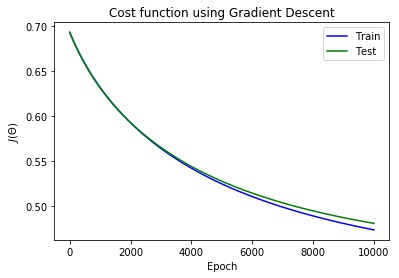

In [88]:
plt.plot(J_history, "-b", label="Train")
plt.plot(J_test_history, "-g", label="Test")
plt.xlabel("Epoch")
plt.ylabel("$J(\Theta)$")
plt.legend()
plt.title("Cost function using Gradient Descent")
plt.show()

### Goal

In [22]:
#coefficent
for i in range(15):
    diff=coef[i+1]-clf.coef_[0][i]
    print(diff)

[0.31264336]
[0.47472415]
[-0.17247729]
[0.27777078]
[-0.31510169]
[0.39614079]
[-0.77002314]
[0.38111128]
[0.17121292]
[-0.19685154]
[-0.14595405]
[-0.16331974]
[0.02254854]
[0.208298]
[-0.30878522]


In [90]:
#intercept
clf.intercept_[0]-coef[0]

array([-0.31537488])